In [4]:
# Data processing:
import numpy as np
import pandas as pd

# Utils:
import sklearn.decomposition
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Visuals:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Set random seed:
GLOBAL_SEED = 419514
np.random.seed(GLOBAL_SEED)

# Computation data format:
comp_dtype = 'float32'

# Increase pandas printing limits
pd.set_option('display.max_columns', 90)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 90)

In [6]:
#data_read_path = os.path.join(".", "data", "raw", "CSV-01-12", "01-12", "DrDoS_SSDP.csv")
#data_df = pd.read_csv(data_read_path)
data_df = pd.read_csv("/content/DrDoS_SSDP.csv")
data_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
data_df.shape


<ipython-input-6-02ecda105faa>:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("/content/DrDoS_SSDP.csv")


(186140, 87)

In [7]:
def first_unique_values(column):
    unique_values = column.value_counts().index.values

    if column.isna().sum()>0:
        unique_values = np.append(np.nan, unique_values)
    sorted_unique_values = unique_values[:min(5, unique_values.shape[0])]

    return sorted_unique_values

def gen_basic_info_dataframe(df, typical_values = True):
    '''
        Making DataFrame with:
         -number of unique values
         -data type
         -percentage of NaN values
         -list with max. 5 most common values in the column.
            If NaN occur in the column it's first element in this list,
            even if it's not the most common value.
    '''
    basic_info=pd.DataFrame(df.nunique(), columns=['num_unique_values'])

    basic_info['data_type']= df.dtypes
    basic_info['NaN_percentage'] = (df.isna().sum())*100/df.shape[0]
    if typical_values:
        basic_info['typical_values'] = df.apply(first_unique_values, axis=0)

    return basic_info
basic_info = gen_basic_info_dataframe(data_df)
basic_info[20:25]

,num_unique_values,data_type,NaN_percentage,typical_values
Flow Bytes/s,30985,float64,0.0,"[750000000.0, 802000000.0, 766000000.0, 147200..."
Flow Packets/s,22320,float64,0.0,"[2000000.0, 1000000.0, 666666.6666666666, inf,..."
Flow IAT Mean,22494,float64,0.0,"[1.0, 2.0, 3.0, 0.0, 48.0]"
Flow IAT Std,45557,float64,0.0,"[0.0, 0.5773502691896257, 0.4472135954999579, ..."
Flow IAT Max,13692,float64,0.0,"[1.0, 2.0, 3.0, 0.0, 48.0]"


In [8]:
data_df.drop(labels=['Flow Bytes/s'], axis=1, inplace=True)

In [9]:
irrelevant_columns = [
    'Flow ID',
    ' Source IP',
    ' Source Port',
    ' Destination IP',
    ' Destination Port',
    ' Timestamp',
    'SimillarHTTP',
    ]

data_df.drop(labels=irrelevant_columns, axis=1, inplace=True)

In [10]:
# get these columns names as a list:
one_value_columns = basic_info[basic_info['num_unique_values']==1].index.tolist()
print("Columns to drop:\n", one_value_columns)

data_df.drop(labels=one_value_columns, axis=1, inplace=True)


Columns to drop:
 [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' PSH Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [11]:
data_df.head()


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0,119714230,49476,214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.150718e+02,2409.270261,36195.71635,2001059.0,0.0,119714230.0,2419.691359,36275.32503,2001059.0,0.0,114024102.0,535324.422535,1.232162e+06,5976064.0,1.0,0.0,0.0,0.0,4.132842e+02,1.78759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49476.0,0.0,214.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DrDoS_SSDP
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.000000e+06,2.000000,0.00000,2.0,2.0,2.0,2.000000,0.00000,2.0,2.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,-2.0,0.0,1.000000e+06,0.00000,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DrDoS_SSDP
2,17,1,2,0,2604.0,0.0,1302.0,1302.0,1302.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000,0.00000,1.0,1.0,1.0,1.000000,0.00000,1.0,1.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,-2.0,0.0,2.000000e+06,0.00000,1302.0,1302.0,1302.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1953.0,1302.0,0.0,-2.0,2.0,2604.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DrDoS_SSDP
3,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.000000e+06,2.000000,0.00000,2.0,2.0,2.0,2.000000,0.00000,2.0,2.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,-2.0,0.0,1.000000e+06,0.00000,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DrDoS_SSDP
4,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.000000e+06,2.000000,0.00000,2.0,2.0,2.0,2.000000,0.00000,2.0,2.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,-2.0,0.0,1.000000e+06,0.00000,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2208.0,1472.0,0.0,-2.0,2.0,2944.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DrDoS_SSDP


In [12]:
columns = data_df.columns
print(columns)

Index([' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bw

In [13]:
print(data_df[' Label'])

unique_values = data_df[' Label'].unique()
print(unique_values)

0         DrDoS_SSDP
1         DrDoS_SSDP
2         DrDoS_SSDP
3         DrDoS_SSDP
4         DrDoS_SSDP
             ...    
186135    DrDoS_SSDP
186136    DrDoS_SSDP
186137    DrDoS_SSDP
186138    DrDoS_SSDP
186139           NaN
Name:  Label, Length: 186140, dtype: object
['DrDoS_SSDP' 'BENIGN' nan]


In [14]:
label_mapping = {'DrDoS_SSDP': 0, 'BENIGN': 1} # 'Syn': 5, 'TFTP': 6, 'UDP-lag': 7, 'WebDDoS': 8} # Add other categories and their corresponding numeric values

data_df[' Label'] = data_df[' Label'].map(label_mapping)

corr_matrix = data_df.corr(method='pearson')

In [15]:
corr_matrix = data_df.corr(method='pearson')

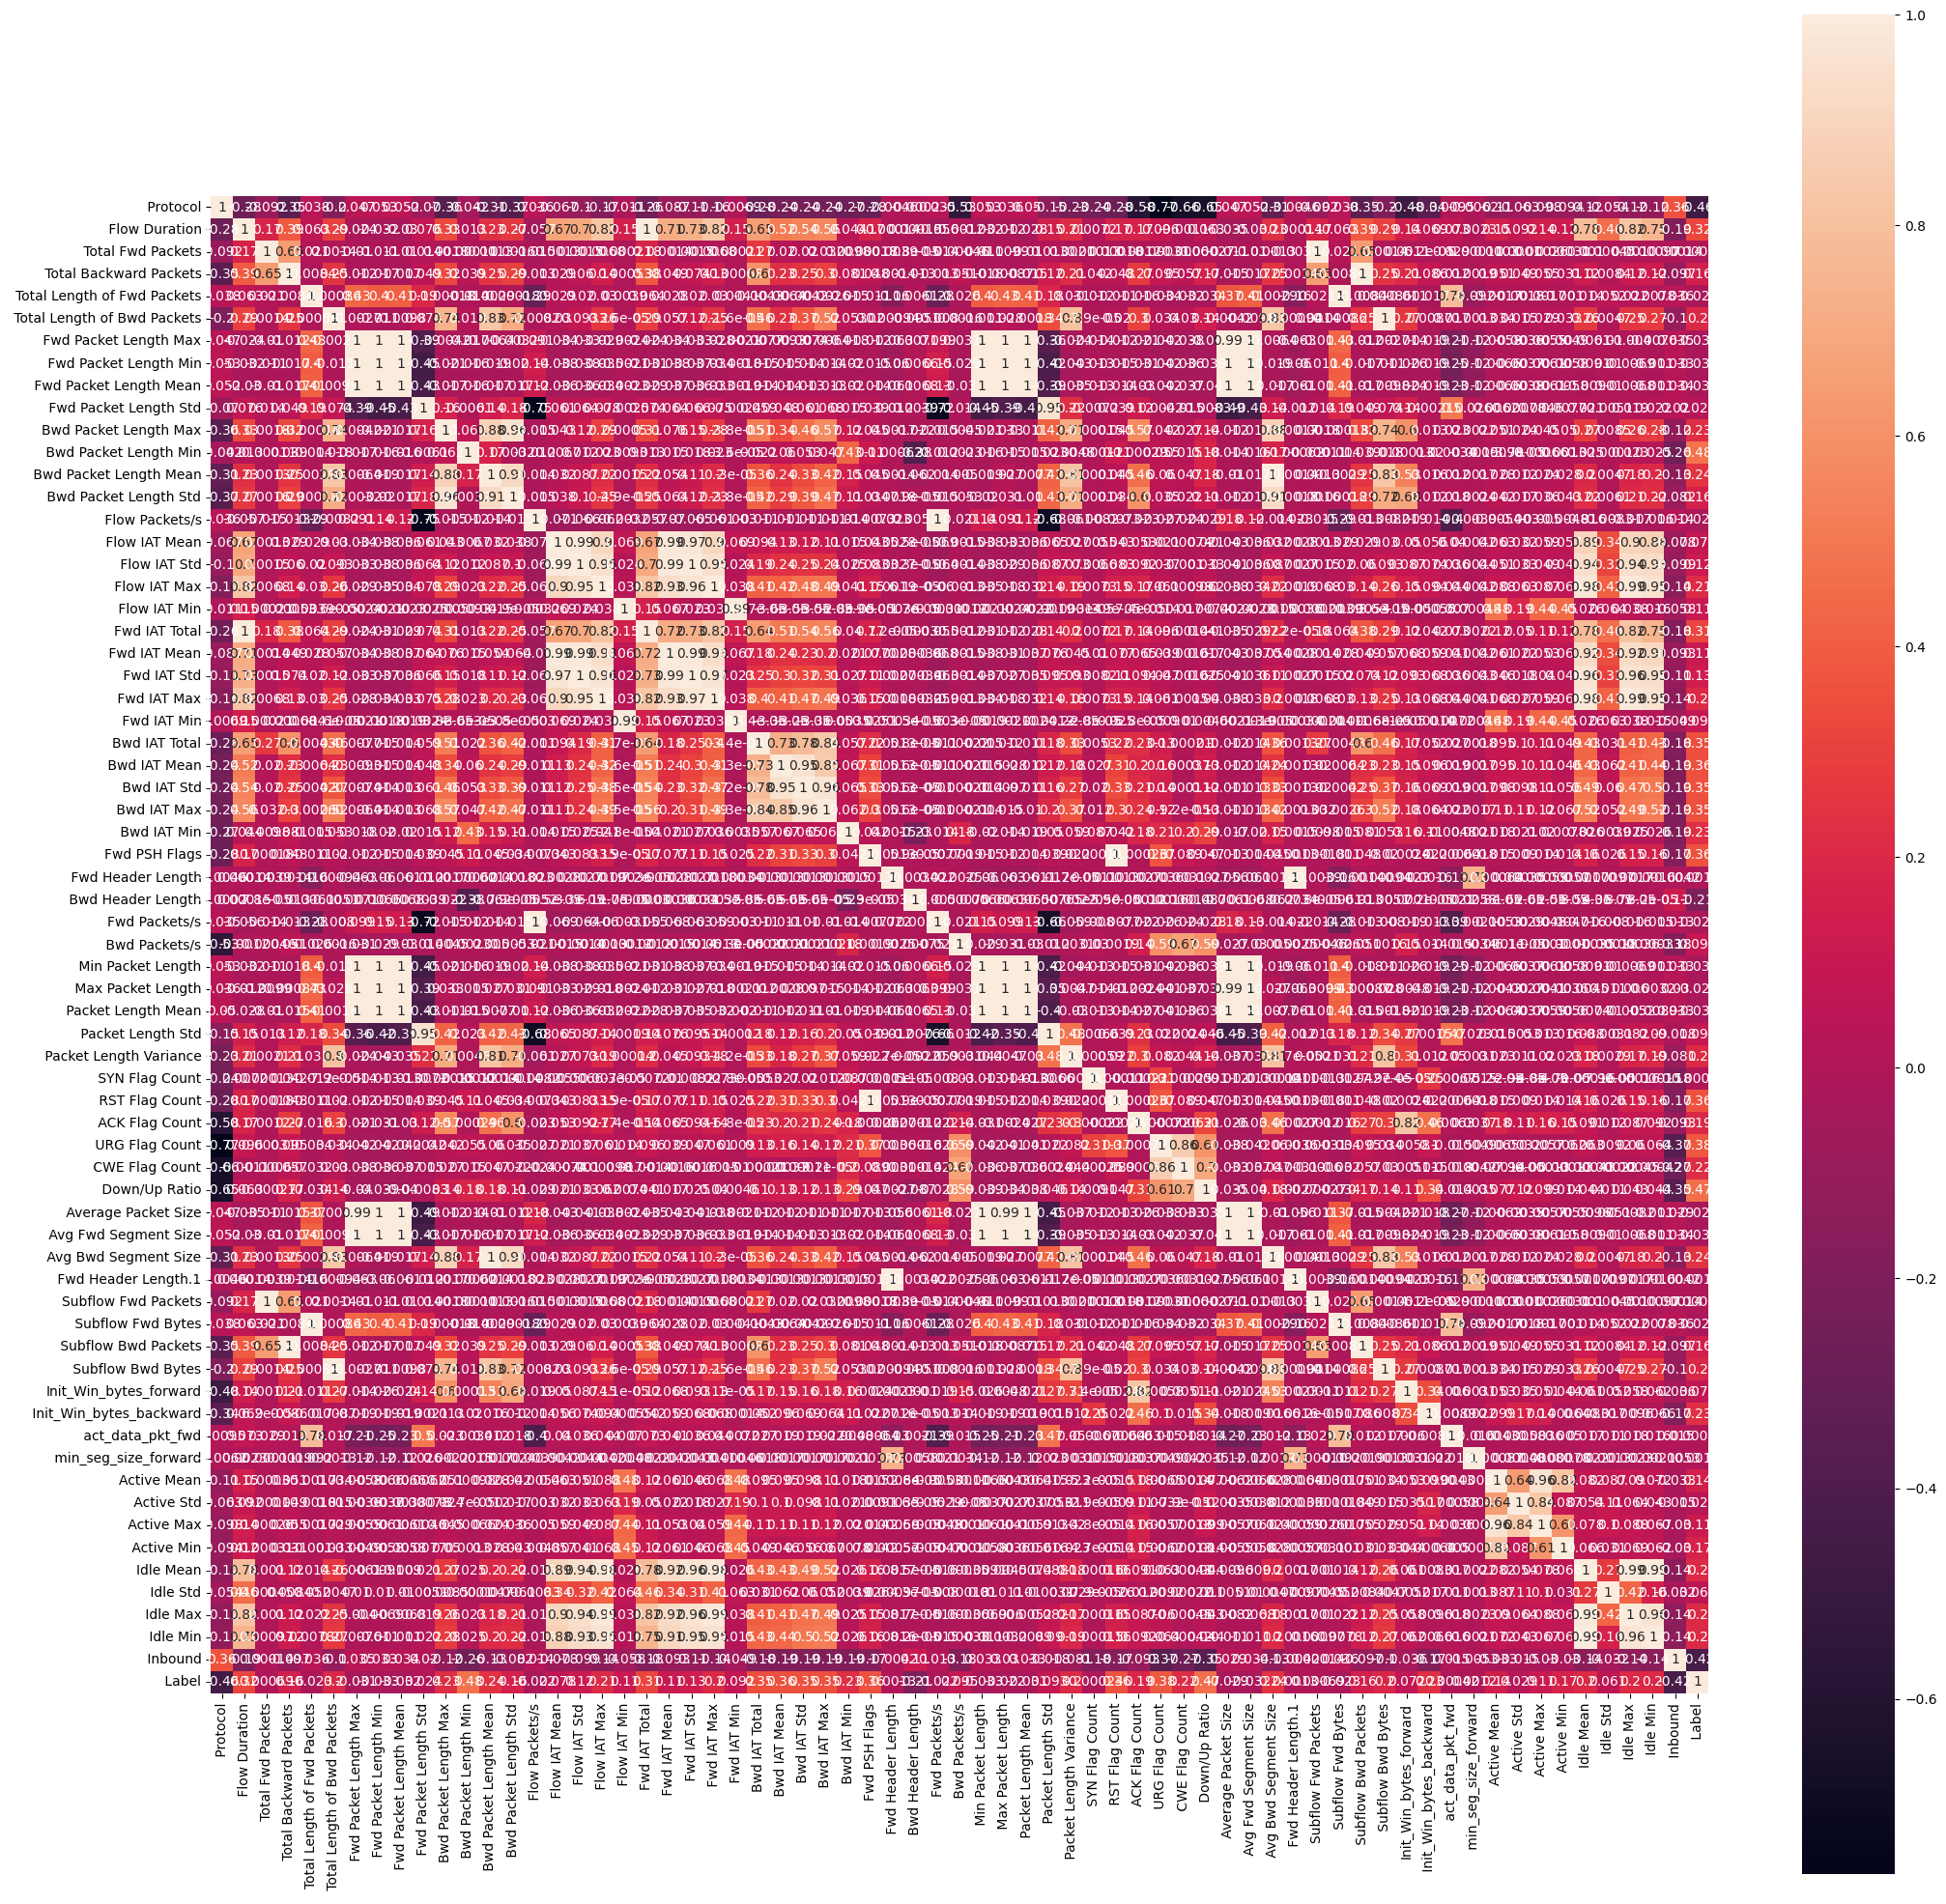

In [16]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr_matrix,
            square=True,
            annot=True,
            ax=ax)
plt.show()

In [17]:
threshold = 0.94

filtered_corr_matrix = corr_matrix[np.abs(corr_matrix)>threshold]
unstack_f_cm = filtered_corr_matrix.unstack().dropna().reset_index()

# remove self-correlations:
corr_pairs = unstack_f_cm[unstack_f_cm['level_0']!=unstack_f_cm['level_1']].reset_index().drop(labels=['index'], axis=1)

print(f'{len(corr_pairs)} correlations between columns with coeff. over {threshold}.')
# set columns to drop:
corr_columns_to_drop = []
for id, row in corr_pairs.iterrows():
    if not (row['level_0'] in corr_columns_to_drop) and not (row['level_1'] in corr_columns_to_drop):
        corr_columns_to_drop.append(row['level_0'])

print(f'{len(corr_columns_to_drop)} columns to drop.')
data_df.drop(labels=corr_columns_to_drop, axis=1, inplace=True)


134 correlations between columns with coeff. over 0.94.
30 columns to drop.


In [18]:
n_samples = 10000

In [19]:
# choose indices from both classes:
benign_ids = data_df[data_df[' Label']==1].index
ddos_ids = data_df[data_df[' Label']==0].index

ddos_samples_ids = np.random.choice(ddos_ids, (n_samples-763))
benign_samples_ids = np.array(benign_ids)
# merge chosen indices:
samples_ids = np.concatenate((ddos_samples_ids, benign_samples_ids))

selected_data_df = data_df.iloc[samples_ids]
selected_data_df[' Label'].value_counts()

,count
Label,
0.0,9237
1.0,116


In [20]:
y = np.array(selected_data_df[' Label'].astype('category').cat.codes.astype(int))

Benign: (9237,)
DDoS: (116,)


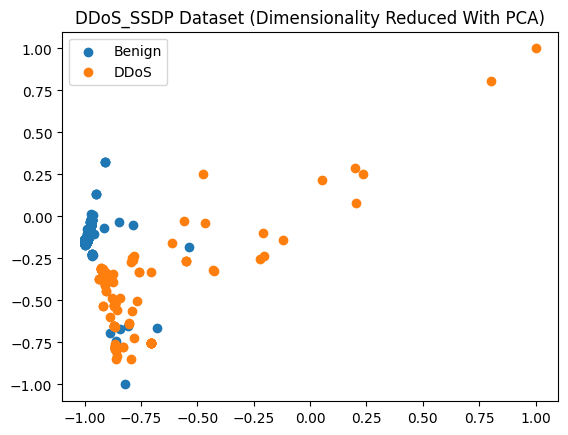

In [21]:
n_features = 2

# Standardize all the features:
x = StandardScaler().fit_transform(np.array(selected_data_df.drop(columns=[' Label'], inplace=False)))

# PCA fitting and transforming the data:
pca = sklearn.decomposition.PCA(n_components=n_features)
pca.fit(x)
x = pca.transform(x)

# Normalize the output to the range (-1, +1):
minmax_scale = MinMaxScaler((-1, 1)).fit(x)
x = minmax_scale.transform(x)
x = x.astype(comp_dtype)

# Plot results:
for k in range(0, 2):
    x_axis_data = x[np.array(y) == k, 0]
    y_axis_data = x[np.array(y) == k, 1]
    label = 'Benign' if k == 0 else 'DDoS'
    print(f'{label}: {x_axis_data.shape}')
    plt.scatter(x_axis_data, y_axis_data, label=label)

plt.title("DDoS_SSDP Dataset (Dimensionality Reduced With PCA)")
plt.legend()
plt.show()

QML

In [22]:
# !pip install pennylane

In [23]:

# !ipip install --upgrade tensorflow
# !pip nstall --upgrade keras

In [24]:
from tensorflow import keras # In TensorFlow 2.0 and above, Keras is part of TensorFlow. You can import it directly from tensorflow.
from keras.callbacks import ReduceLROnPlateau # If you have a separate installation of Keras, you should import it like this.

In [25]:
# QML
import pennylane as qml

# ML
import tensorflow as tf
from tensorflow .keras.callbacks import ReduceLROnPlateau

# Data processing:
import numpy as np

# Utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, make_scorer

# Visuals:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [26]:
# Set random seed:
GLOBAL_SEED = 419514
np.random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)
# Computation data format:
comp_dtype = 'float32'

In [27]:
# set ratio:
train_val_test_split = [0.7, 0.15, 0.15]
test_val_size = sum(train_val_test_split[1:])
val_size = train_val_test_split[2]/test_val_size

# split dataset:
trainX, testX, trainy, testy = train_test_split(x, y, stratify=y, test_size=test_val_size, random_state=GLOBAL_SEED)
testX, valx, testy, valy = train_test_split(testX, testy, stratify=testy, test_size=val_size, random_state=GLOBAL_SEED)

# One-hot encode:
trainy = tf.one_hot(trainy, depth=n_features, dtype=comp_dtype)
testy = tf.one_hot(testy, depth=n_features, dtype=comp_dtype)
valy = tf.one_hot(valy, depth=n_features, dtype=comp_dtype)

In [28]:
n_qubits = 2
layers = 1
data_dimension = n_features

batch_size = 5
n_epochs = 1

<Figure size 1000x1000 with 0 Axes>

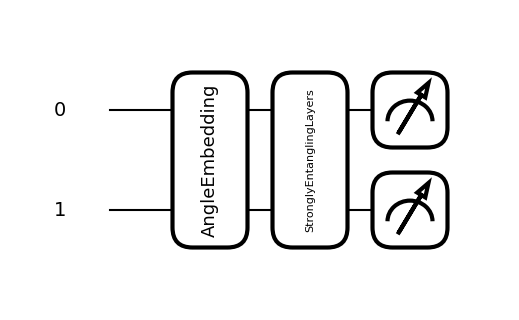

In [29]:
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(np.pi*inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


weight_shapes = {"weights": (layers,n_qubits,3)}

inputs = np.random.rand(n_qubits).astype(comp_dtype)
weights = np.random.rand(layers, n_qubits, 3).astype(comp_dtype)

plt.figure(figsize=(10,10))
qml.draw_mpl(qnode)(inputs, weights)
plt.show()


In [30]:

#!pip install keras==2.10.0
#!pip install tensorflow==2.12.0
#!pip install keras==2.12.0


In [31]:
# !pip install --upgrade pip
# !pip install --upgrade tensorflow
# !pip install --upgrade keras

In [32]:
# !pip install keras==2.10.0 # Installs Keras version 2.10.0
# !pip install tensorflow==2.10.0 # Installs TensorFlow compatible with Keras 2.10.0

import pennylane as qml
import tensorflow as tf
import numpy as np
import keras

q_layer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits, dtype=comp_dtype)
q_layer.build(2)

q_model = tf.keras.models.Sequential()
q_model.add(tf.keras.layers.Dense(n_qubits, activation='sigmoid', input_dim=data_dimension))
q_model.add(q_layer)
q_model.add(tf.keras.layers.Dense(data_dimension, activation='softmax'))

q_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 keras_layer (KerasLayer)    (None, 2)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [33]:

#!pip uninstall keras
#!pip install keras==2.10.0

In [34]:
%%time

opt = tf.keras.optimizers.Adam(learning_rate=0.05)
q_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

q_history = q_model.fit(trainX, trainy, validation_data=(testX, testy), epochs=n_epochs, batch_size=batch_size)

   1/1310 [..............................] - ETA: 7:31 - loss: 0.4902 - accuracy: 1.0000

   2/1310 [..............................] - ETA: 2:14 - loss: 0.4282 - accuracy: 1.0000

   3/1310 [..............................] - ETA: 2:00 - loss: 0.4415 - accuracy: 0.9333

   4/1310 [..............................] - ETA: 1:56 - loss: 0.3770 - accuracy: 0.9500

   5/1310 [..............................] - ETA: 1:52 - loss: 0.3266 - accuracy: 0.9600

   6/1310 [..............................] - ETA: 1:51 - loss: 0.2860 - accuracy: 0.9667

   7/1310 [..............................] - ETA: 1:51 - loss: 0.2530 - accuracy: 0.9714

   8/1310 [..............................] - ETA: 1:52 - loss: 0.2259 - accuracy: 0.9750

   9/1310 [..............................] - ETA: 1:56 - loss: 0.2036 - accuracy: 0.9778

  10/1310 [..............................] - ETA: 1:55 - loss: 0.2596 - accuracy: 0.9600

  11/1310 [..............................] - ETA: 1:54 - loss: 0.2374 - accuracy: 0.9636

  12/1310 [..............................] - ETA: 1:53 - loss: 0.2187 - accuracy: 0.9667

  13/1310 [..............................] - ETA: 1:53 - loss: 0.2028 - accuracy: 0.9692

  14/1310 [..............................] - ETA: 1:52 - loss: 0.1891 - accuracy: 0.9714

  15/1310 [..............................] - ETA: 1:51 - loss: 0.1772 - accuracy: 0.9733

  16/1310 [..............................] - ETA: 1:50 - loss: 0.1667 - accuracy: 0.9750

  17/1310 [..............................] - ETA: 1:50 - loss: 0.1574 - accuracy: 0.9765

  18/1310 [..............................] - ETA: 1:49 - loss: 0.1490 - accuracy: 0.9778

  19/1310 [..............................] - ETA: 1:49 - loss: 0.1416 - accuracy: 0.9789

  20/1310 [..............................] - ETA: 1:49 - loss: 0.1348 - accuracy: 0.9800

  21/1310 [..............................] - ETA: 1:51 - loss: 0.1761 - accuracy: 0.9714

  22/1310 [..............................] - ETA: 1:51 - loss: 0.1684 - accuracy: 0.9727

  23/1310 [..............................] - ETA: 1:50 - loss: 0.1614 - accuracy: 0.9739

  24/1310 [..............................] - ETA: 1:50 - loss: 0.1549 - accuracy: 0.9750

  25/1310 [..............................] - ETA: 1:50 - loss: 0.1490 - accuracy: 0.9760

  26/1310 [..............................] - ETA: 1:49 - loss: 0.1436 - accuracy: 0.9769

  27/1310 [..............................] - ETA: 1:49 - loss: 0.1386 - accuracy: 0.9778

  28/1310 [..............................] - ETA: 1:49 - loss: 0.1339 - accuracy: 0.9786

  29/1310 [..............................] - ETA: 1:49 - loss: 0.1296 - accuracy: 0.9793

  30/1310 [..............................] - ETA: 1:48 - loss: 0.1255 - accuracy: 0.9800

  31/1310 [..............................] - ETA: 1:48 - loss: 0.1218 - accuracy: 0.9806

  32/1310 [..............................] - ETA: 1:49 - loss: 0.1182 - accuracy: 0.9812

  33/1310 [..............................] - ETA: 1:49 - loss: 0.1149 - accuracy: 0.9818

  34/1310 [..............................] - ETA: 1:49 - loss: 0.1117 - accuracy: 0.9824

  35/1310 [..............................] - ETA: 1:49 - loss: 0.1087 - accuracy: 0.9829

  36/1310 [..............................] - ETA: 1:49 - loss: 0.1059 - accuracy: 0.9833

  37/1310 [..............................] - ETA: 1:48 - loss: 0.1033 - accuracy: 0.9838

  38/1310 [..............................] - ETA: 1:48 - loss: 0.1007 - accuracy: 0.9842

  39/1310 [..............................] - ETA: 1:47 - loss: 0.0983 - accuracy: 0.9846

  40/1310 [..............................] - ETA: 1:48 - loss: 0.0960 - accuracy: 0.9850

  41/1310 [..............................] - ETA: 1:49 - loss: 0.0938 - accuracy: 0.9854

  42/1310 [..............................] - ETA: 1:50 - loss: 0.0917 - accuracy: 0.9857

  43/1310 [..............................] - ETA: 1:51 - loss: 0.0897 - accuracy: 0.9860

  44/1310 [>.............................] - ETA: 1:52 - loss: 0.0878 - accuracy: 0.9864

  45/1310 [>.............................] - ETA: 1:52 - loss: 0.0860 - accuracy: 0.9867

  46/1310 [>.............................] - ETA: 1:53 - loss: 0.0842 - accuracy: 0.9870

  47/1310 [>.............................] - ETA: 1:53 - loss: 0.0825 - accuracy: 0.9872

  48/1310 [>.............................] - ETA: 1:53 - loss: 0.0809 - accuracy: 0.9875

  49/1310 [>.............................] - ETA: 1:54 - loss: 0.0793 - accuracy: 0.9878

  50/1310 [>.............................] - ETA: 1:54 - loss: 0.0778 - accuracy: 0.9880

  51/1310 [>.............................] - ETA: 1:54 - loss: 0.0764 - accuracy: 0.9882

  52/1310 [>.............................] - ETA: 1:54 - loss: 0.0750 - accuracy: 0.9885

  53/1310 [>.............................] - ETA: 1:55 - loss: 0.0736 - accuracy: 0.9887

  54/1310 [>.............................] - ETA: 1:56 - loss: 0.0723 - accuracy: 0.9889

  55/1310 [>.............................] - ETA: 1:57 - loss: 0.0711 - accuracy: 0.9891

  56/1310 [>.............................] - ETA: 1:57 - loss: 0.0699 - accuracy: 0.9893

  57/1310 [>.............................] - ETA: 1:58 - loss: 0.0687 - accuracy: 0.9895

  58/1310 [>.............................] - ETA: 1:58 - loss: 0.0676 - accuracy: 0.9897

  59/1310 [>.............................] - ETA: 1:59 - loss: 0.0665 - accuracy: 0.9898

  60/1310 [>.............................] - ETA: 1:59 - loss: 0.0654 - accuracy: 0.9900

  61/1310 [>.............................] - ETA: 1:59 - loss: 0.0644 - accuracy: 0.9902

  62/1310 [>.............................] - ETA: 2:00 - loss: 0.0634 - accuracy: 0.9903

  63/1310 [>.............................] - ETA: 2:00 - loss: 0.0624 - accuracy: 0.9905

  64/1310 [>.............................] - ETA: 2:01 - loss: 0.0615 - accuracy: 0.9906

  65/1310 [>.............................] - ETA: 2:01 - loss: 0.0606 - accuracy: 0.9908

  66/1310 [>.............................] - ETA: 2:01 - loss: 0.0597 - accuracy: 0.9909

  67/1310 [>.............................] - ETA: 2:01 - loss: 0.0588 - accuracy: 0.9910

  68/1310 [>.............................] - ETA: 2:02 - loss: 0.0755 - accuracy: 0.9882

  69/1310 [>.............................] - ETA: 2:03 - loss: 0.0745 - accuracy: 0.9884

  70/1310 [>.............................] - ETA: 2:03 - loss: 0.0734 - accuracy: 0.9886

  71/1310 [>.............................] - ETA: 2:04 - loss: 0.0724 - accuracy: 0.9887

  72/1310 [>.............................] - ETA: 2:04 - loss: 0.0715 - accuracy: 0.9889

  73/1310 [>.............................] - ETA: 2:05 - loss: 0.0706 - accuracy: 0.9890

  74/1310 [>.............................] - ETA: 2:04 - loss: 0.0697 - accuracy: 0.9892

  75/1310 [>.............................] - ETA: 2:04 - loss: 0.0688 - accuracy: 0.9893

  76/1310 [>.............................] - ETA: 2:04 - loss: 0.0679 - accuracy: 0.9895

  77/1310 [>.............................] - ETA: 2:03 - loss: 0.0781 - accuracy: 0.9870

  78/1310 [>.............................] - ETA: 2:03 - loss: 0.0771 - accuracy: 0.9872

  79/1310 [>.............................] - ETA: 2:03 - loss: 0.0762 - accuracy: 0.9873

  80/1310 [>.............................] - ETA: 2:02 - loss: 0.0754 - accuracy: 0.9875

  81/1310 [>.............................] - ETA: 2:02 - loss: 0.0746 - accuracy: 0.9877

  82/1310 [>.............................] - ETA: 2:01 - loss: 0.0738 - accuracy: 0.9878

  83/1310 [>.............................] - ETA: 2:01 - loss: 0.0730 - accuracy: 0.9880

  84/1310 [>.............................] - ETA: 2:01 - loss: 0.0723 - accuracy: 0.9881

  85/1310 [>.............................] - ETA: 2:00 - loss: 0.0716 - accuracy: 0.9882

  86/1310 [>.............................] - ETA: 2:00 - loss: 0.0709 - accuracy: 0.9884

  87/1310 [>.............................] - ETA: 1:59 - loss: 0.0703 - accuracy: 0.9885

  88/1310 [=>............................] - ETA: 1:59 - loss: 0.0696 - accuracy: 0.9886

  89/1310 [=>............................] - ETA: 1:59 - loss: 0.0690 - accuracy: 0.9888

  90/1310 [=>............................] - ETA: 1:59 - loss: 0.0774 - accuracy: 0.9867

  91/1310 [=>............................] - ETA: 1:59 - loss: 0.0767 - accuracy: 0.9868

  92/1310 [=>............................] - ETA: 1:58 - loss: 0.0761 - accuracy: 0.9870

  93/1310 [=>............................] - ETA: 1:58 - loss: 0.0755 - accuracy: 0.9871

  94/1310 [=>............................] - ETA: 1:58 - loss: 0.0750 - accuracy: 0.9872

  95/1310 [=>............................] - ETA: 1:58 - loss: 0.0744 - accuracy: 0.9874

  96/1310 [=>............................] - ETA: 1:57 - loss: 0.0739 - accuracy: 0.9875

  97/1310 [=>............................] - ETA: 1:57 - loss: 0.0734 - accuracy: 0.9876

  98/1310 [=>............................] - ETA: 1:57 - loss: 0.0729 - accuracy: 0.9878

  99/1310 [=>............................] - ETA: 1:56 - loss: 0.0723 - accuracy: 0.9879

 100/1310 [=>............................] - ETA: 1:56 - loss: 0.0718 - accuracy: 0.9880

 101/1310 [=>............................] - ETA: 1:56 - loss: 0.0713 - accuracy: 0.9881

 102/1310 [=>............................] - ETA: 1:56 - loss: 0.0708 - accuracy: 0.9882

 103/1310 [=>............................] - ETA: 1:56 - loss: 0.0702 - accuracy: 0.9883

 104/1310 [=>............................] - ETA: 1:55 - loss: 0.0697 - accuracy: 0.9885

 105/1310 [=>............................] - ETA: 1:55 - loss: 0.0757 - accuracy: 0.9867

 106/1310 [=>............................] - ETA: 1:55 - loss: 0.0751 - accuracy: 0.9868

 107/1310 [=>............................] - ETA: 1:55 - loss: 0.0745 - accuracy: 0.9869

 108/1310 [=>............................] - ETA: 1:54 - loss: 0.0740 - accuracy: 0.9870

 109/1310 [=>............................] - ETA: 1:54 - loss: 0.0735 - accuracy: 0.9872

 110/1310 [=>............................] - ETA: 1:54 - loss: 0.0730 - accuracy: 0.9873

 111/1310 [=>............................] - ETA: 1:54 - loss: 0.0785 - accuracy: 0.9856

 112/1310 [=>............................] - ETA: 1:53 - loss: 0.0779 - accuracy: 0.9857

 113/1310 [=>............................] - ETA: 1:53 - loss: 0.0808 - accuracy: 0.9841

 114/1310 [=>............................] - ETA: 1:53 - loss: 0.0804 - accuracy: 0.9842

 115/1310 [=>............................] - ETA: 1:53 - loss: 0.0800 - accuracy: 0.9843

 116/1310 [=>............................] - ETA: 1:53 - loss: 0.0798 - accuracy: 0.9845

 117/1310 [=>............................] - ETA: 1:53 - loss: 0.0796 - accuracy: 0.9846

 118/1310 [=>............................] - ETA: 1:53 - loss: 0.0794 - accuracy: 0.9847

 119/1310 [=>............................] - ETA: 1:52 - loss: 0.0792 - accuracy: 0.9849

 120/1310 [=>............................] - ETA: 1:52 - loss: 0.0789 - accuracy: 0.9850

 121/1310 [=>............................] - ETA: 1:52 - loss: 0.0787 - accuracy: 0.9851

 122/1310 [=>............................] - ETA: 1:52 - loss: 0.0783 - accuracy: 0.9852

 123/1310 [=>............................] - ETA: 1:51 - loss: 0.0779 - accuracy: 0.9854

 124/1310 [=>............................] - ETA: 1:51 - loss: 0.0775 - accuracy: 0.9855

 125/1310 [=>............................] - ETA: 1:51 - loss: 0.0770 - accuracy: 0.9856

 126/1310 [=>............................] - ETA: 1:51 - loss: 0.0765 - accuracy: 0.9857

 127/1310 [=>............................] - ETA: 1:51 - loss: 0.0760 - accuracy: 0.9858

 128/1310 [=>............................] - ETA: 1:51 - loss: 0.0755 - accuracy: 0.9859

 129/1310 [=>............................] - ETA: 1:51 - loss: 0.0750 - accuracy: 0.9860

 130/1310 [=>............................] - ETA: 1:50 - loss: 0.0744 - accuracy: 0.9862

 131/1310 [==>...........................] - ETA: 1:50 - loss: 0.0739 - accuracy: 0.9863

 132/1310 [==>...........................] - ETA: 1:50 - loss: 0.0734 - accuracy: 0.9864

 133/1310 [==>...........................] - ETA: 1:50 - loss: 0.0729 - accuracy: 0.9865

 134/1310 [==>...........................] - ETA: 1:50 - loss: 0.0724 - accuracy: 0.9866

 135/1310 [==>...........................] - ETA: 1:50 - loss: 0.0719 - accuracy: 0.9867

 136/1310 [==>...........................] - ETA: 1:50 - loss: 0.0714 - accuracy: 0.9868

 137/1310 [==>...........................] - ETA: 1:50 - loss: 0.0709 - accuracy: 0.9869

 138/1310 [==>...........................] - ETA: 1:49 - loss: 0.0704 - accuracy: 0.9870

 139/1310 [==>...........................] - ETA: 1:49 - loss: 0.0699 - accuracy: 0.9871

 140/1310 [==>...........................] - ETA: 1:49 - loss: 0.0694 - accuracy: 0.9871

 141/1310 [==>...........................] - ETA: 1:49 - loss: 0.0689 - accuracy: 0.9872

 142/1310 [==>...........................] - ETA: 1:49 - loss: 0.0685 - accuracy: 0.9873

 143/1310 [==>...........................] - ETA: 1:49 - loss: 0.0680 - accuracy: 0.9874

 144/1310 [==>...........................] - ETA: 1:49 - loss: 0.0676 - accuracy: 0.9875

 145/1310 [==>...........................] - ETA: 1:49 - loss: 0.0671 - accuracy: 0.9876

 146/1310 [==>...........................] - ETA: 1:49 - loss: 0.0667 - accuracy: 0.9877

 147/1310 [==>...........................] - ETA: 1:49 - loss: 0.0662 - accuracy: 0.9878

 148/1310 [==>...........................] - ETA: 1:49 - loss: 0.0658 - accuracy: 0.9878

 149/1310 [==>...........................] - ETA: 1:48 - loss: 0.0654 - accuracy: 0.9879

 150/1310 [==>...........................] - ETA: 1:48 - loss: 0.0649 - accuracy: 0.9880

 151/1310 [==>...........................] - ETA: 1:48 - loss: 0.0645 - accuracy: 0.9881

 152/1310 [==>...........................] - ETA: 1:48 - loss: 0.0641 - accuracy: 0.9882

 153/1310 [==>...........................] - ETA: 1:48 - loss: 0.0637 - accuracy: 0.9882

 154/1310 [==>...........................] - ETA: 1:48 - loss: 0.0633 - accuracy: 0.9883

 155/1310 [==>...........................] - ETA: 1:47 - loss: 0.0629 - accuracy: 0.9884

 156/1310 [==>...........................] - ETA: 1:47 - loss: 0.0625 - accuracy: 0.9885

 157/1310 [==>...........................] - ETA: 1:47 - loss: 0.0621 - accuracy: 0.9885

 158/1310 [==>...........................] - ETA: 1:47 - loss: 0.0617 - accuracy: 0.9886

 159/1310 [==>...........................] - ETA: 1:47 - loss: 0.0613 - accuracy: 0.9887

 160/1310 [==>...........................] - ETA: 1:47 - loss: 0.0650 - accuracy: 0.9875

 161/1310 [==>...........................] - ETA: 1:47 - loss: 0.0721 - accuracy: 0.9863

 162/1310 [==>...........................] - ETA: 1:46 - loss: 0.0716 - accuracy: 0.9864

 163/1310 [==>...........................] - ETA: 1:46 - loss: 0.0712 - accuracy: 0.9865

 164/1310 [==>...........................] - ETA: 1:46 - loss: 0.0708 - accuracy: 0.9866

 165/1310 [==>...........................] - ETA: 1:46 - loss: 0.0704 - accuracy: 0.9867

 166/1310 [==>...........................] - ETA: 1:46 - loss: 0.0700 - accuracy: 0.9867

 167/1310 [==>...........................] - ETA: 1:46 - loss: 0.0696 - accuracy: 0.9868

 168/1310 [==>...........................] - ETA: 1:46 - loss: 0.0692 - accuracy: 0.9869

 169/1310 [==>...........................] - ETA: 1:45 - loss: 0.0689 - accuracy: 0.9870

 170/1310 [==>...........................] - ETA: 1:45 - loss: 0.0685 - accuracy: 0.9871

 171/1310 [==>...........................] - ETA: 1:45 - loss: 0.0682 - accuracy: 0.9871

 172/1310 [==>...........................] - ETA: 1:45 - loss: 0.0678 - accuracy: 0.9872

 173/1310 [==>...........................] - ETA: 1:45 - loss: 0.0675 - accuracy: 0.9873

 174/1310 [==>...........................] - ETA: 1:45 - loss: 0.0672 - accuracy: 0.9874

 175/1310 [===>..........................] - ETA: 1:45 - loss: 0.0668 - accuracy: 0.9874

 176/1310 [===>..........................] - ETA: 1:45 - loss: 0.0665 - accuracy: 0.9875

 177/1310 [===>..........................] - ETA: 1:44 - loss: 0.0662 - accuracy: 0.9876

 178/1310 [===>..........................] - ETA: 1:44 - loss: 0.0659 - accuracy: 0.9876

 179/1310 [===>..........................] - ETA: 1:44 - loss: 0.0656 - accuracy: 0.9877

 180/1310 [===>..........................] - ETA: 1:44 - loss: 0.0652 - accuracy: 0.9878

 181/1310 [===>..........................] - ETA: 1:44 - loss: 0.0649 - accuracy: 0.9878

 182/1310 [===>..........................] - ETA: 1:44 - loss: 0.0646 - accuracy: 0.9879

 183/1310 [===>..........................] - ETA: 1:44 - loss: 0.0643 - accuracy: 0.9880

 184/1310 [===>..........................] - ETA: 1:43 - loss: 0.0640 - accuracy: 0.9880

 185/1310 [===>..........................] - ETA: 1:43 - loss: 0.0637 - accuracy: 0.9881

 186/1310 [===>..........................] - ETA: 1:43 - loss: 0.0634 - accuracy: 0.9882

 187/1310 [===>..........................] - ETA: 1:43 - loss: 0.0631 - accuracy: 0.9882

 188/1310 [===>..........................] - ETA: 1:43 - loss: 0.0628 - accuracy: 0.9883

 189/1310 [===>..........................] - ETA: 1:43 - loss: 0.0625 - accuracy: 0.9884

 190/1310 [===>..........................] - ETA: 1:43 - loss: 0.0622 - accuracy: 0.9884

 191/1310 [===>..........................] - ETA: 1:43 - loss: 0.0619 - accuracy: 0.9885

 192/1310 [===>..........................] - ETA: 1:43 - loss: 0.0616 - accuracy: 0.9885

 193/1310 [===>..........................] - ETA: 1:43 - loss: 0.0613 - accuracy: 0.9886

 194/1310 [===>..........................] - ETA: 1:43 - loss: 0.0610 - accuracy: 0.9887

 195/1310 [===>..........................] - ETA: 1:43 - loss: 0.0607 - accuracy: 0.9887

 196/1310 [===>..........................] - ETA: 1:43 - loss: 0.0604 - accuracy: 0.9888

 197/1310 [===>..........................] - ETA: 1:43 - loss: 0.0602 - accuracy: 0.9888

 198/1310 [===>..........................] - ETA: 1:43 - loss: 0.0599 - accuracy: 0.9889

 199/1310 [===>..........................] - ETA: 1:43 - loss: 0.0596 - accuracy: 0.9889

 200/1310 [===>..........................] - ETA: 1:43 - loss: 0.0593 - accuracy: 0.9890

 201/1310 [===>..........................] - ETA: 1:43 - loss: 0.0590 - accuracy: 0.9891

 202/1310 [===>..........................] - ETA: 1:43 - loss: 0.0587 - accuracy: 0.9891

 203/1310 [===>..........................] - ETA: 1:44 - loss: 0.0585 - accuracy: 0.9892

 204/1310 [===>..........................] - ETA: 1:44 - loss: 0.0582 - accuracy: 0.9892

 205/1310 [===>..........................] - ETA: 1:44 - loss: 0.0579 - accuracy: 0.9893

 206/1310 [===>..........................] - ETA: 1:44 - loss: 0.0577 - accuracy: 0.9893

 207/1310 [===>..........................] - ETA: 1:44 - loss: 0.0574 - accuracy: 0.9894

 208/1310 [===>..........................] - ETA: 1:44 - loss: 0.0571 - accuracy: 0.9894

 209/1310 [===>..........................] - ETA: 1:44 - loss: 0.0617 - accuracy: 0.9885

 210/1310 [===>..........................] - ETA: 1:44 - loss: 0.0614 - accuracy: 0.9886

 211/1310 [===>..........................] - ETA: 1:44 - loss: 0.0611 - accuracy: 0.9886

 212/1310 [===>..........................] - ETA: 1:44 - loss: 0.0609 - accuracy: 0.9887

 213/1310 [===>..........................] - ETA: 1:44 - loss: 0.0606 - accuracy: 0.9887

 214/1310 [===>..........................] - ETA: 1:44 - loss: 0.0603 - accuracy: 0.9888

 215/1310 [===>..........................] - ETA: 1:44 - loss: 0.0601 - accuracy: 0.9888

 216/1310 [===>..........................] - ETA: 1:44 - loss: 0.0598 - accuracy: 0.9889

 217/1310 [===>..........................] - ETA: 1:44 - loss: 0.0596 - accuracy: 0.9889

 218/1310 [===>..........................] - ETA: 1:44 - loss: 0.0607 - accuracy: 0.9881

 219/1310 [====>.........................] - ETA: 1:45 - loss: 0.0604 - accuracy: 0.9881

 220/1310 [====>.........................] - ETA: 1:45 - loss: 0.0602 - accuracy: 0.9882

 221/1310 [====>.........................] - ETA: 1:45 - loss: 0.0600 - accuracy: 0.9882

 222/1310 [====>.........................] - ETA: 1:45 - loss: 0.0598 - accuracy: 0.9883

 223/1310 [====>.........................] - ETA: 1:45 - loss: 0.0596 - accuracy: 0.9883

 224/1310 [====>.........................] - ETA: 1:44 - loss: 0.0594 - accuracy: 0.9884

 225/1310 [====>.........................] - ETA: 1:44 - loss: 0.0592 - accuracy: 0.9884

 226/1310 [====>.........................] - ETA: 1:44 - loss: 0.0591 - accuracy: 0.9885

 227/1310 [====>.........................] - ETA: 1:44 - loss: 0.0589 - accuracy: 0.9885

 228/1310 [====>.........................] - ETA: 1:44 - loss: 0.0587 - accuracy: 0.9886

 229/1310 [====>.........................] - ETA: 1:44 - loss: 0.0585 - accuracy: 0.9886

 230/1310 [====>.........................] - ETA: 1:43 - loss: 0.0583 - accuracy: 0.9887

 231/1310 [====>.........................] - ETA: 1:43 - loss: 0.0582 - accuracy: 0.9887

 232/1310 [====>.........................] - ETA: 1:43 - loss: 0.0605 - accuracy: 0.9879

 233/1310 [====>.........................] - ETA: 1:43 - loss: 0.0603 - accuracy: 0.9880

 234/1310 [====>.........................] - ETA: 1:43 - loss: 0.0601 - accuracy: 0.9880

 235/1310 [====>.........................] - ETA: 1:43 - loss: 0.0600 - accuracy: 0.9881

 236/1310 [====>.........................] - ETA: 1:43 - loss: 0.0598 - accuracy: 0.9881

 237/1310 [====>.........................] - ETA: 1:43 - loss: 0.0597 - accuracy: 0.9882

 238/1310 [====>.........................] - ETA: 1:42 - loss: 0.0595 - accuracy: 0.9882

 239/1310 [====>.........................] - ETA: 1:42 - loss: 0.0594 - accuracy: 0.9883

 240/1310 [====>.........................] - ETA: 1:42 - loss: 0.0592 - accuracy: 0.9883

 241/1310 [====>.........................] - ETA: 1:42 - loss: 0.0590 - accuracy: 0.9884

 242/1310 [====>.........................] - ETA: 1:42 - loss: 0.0589 - accuracy: 0.9884

 243/1310 [====>.........................] - ETA: 1:42 - loss: 0.0587 - accuracy: 0.9885

 244/1310 [====>.........................] - ETA: 1:42 - loss: 0.0585 - accuracy: 0.9885

 245/1310 [====>.........................] - ETA: 1:41 - loss: 0.0583 - accuracy: 0.9886

 246/1310 [====>.........................] - ETA: 1:41 - loss: 0.0581 - accuracy: 0.9886

 247/1310 [====>.........................] - ETA: 1:41 - loss: 0.0579 - accuracy: 0.9887

 248/1310 [====>.........................] - ETA: 1:41 - loss: 0.0577 - accuracy: 0.9887

 249/1310 [====>.........................] - ETA: 1:42 - loss: 0.0575 - accuracy: 0.9888

 250/1310 [====>.........................] - ETA: 1:43 - loss: 0.0573 - accuracy: 0.9888

 251/1310 [====>.........................] - ETA: 1:44 - loss: 0.0571 - accuracy: 0.9888

 252/1310 [====>.........................] - ETA: 1:44 - loss: 0.0569 - accuracy: 0.9889

 253/1310 [====>.........................] - ETA: 1:45 - loss: 0.0567 - accuracy: 0.9889

 254/1310 [====>.........................] - ETA: 1:45 - loss: 0.0564 - accuracy: 0.9890

 255/1310 [====>.........................] - ETA: 1:45 - loss: 0.0562 - accuracy: 0.9890

 256/1310 [====>.........................] - ETA: 1:46 - loss: 0.0560 - accuracy: 0.9891

 257/1310 [====>.........................] - ETA: 1:46 - loss: 0.0558 - accuracy: 0.9891

 258/1310 [====>.........................] - ETA: 1:46 - loss: 0.0556 - accuracy: 0.9891

 259/1310 [====>.........................] - ETA: 1:47 - loss: 0.0554 - accuracy: 0.9892

 260/1310 [====>.........................] - ETA: 1:48 - loss: 0.0552 - accuracy: 0.9892

 261/1310 [====>.........................] - ETA: 1:48 - loss: 0.0550 - accuracy: 0.9893

 262/1310 [=====>........................] - ETA: 1:48 - loss: 0.0548 - accuracy: 0.9893

 263/1310 [=====>........................] - ETA: 1:49 - loss: 0.0546 - accuracy: 0.9894

 264/1310 [=====>........................] - ETA: 1:50 - loss: 0.0544 - accuracy: 0.9894

 265/1310 [=====>........................] - ETA: 1:50 - loss: 0.0542 - accuracy: 0.9894

 266/1310 [=====>........................] - ETA: 1:50 - loss: 0.0540 - accuracy: 0.9895

 267/1310 [=====>........................] - ETA: 1:51 - loss: 0.0538 - accuracy: 0.9895

 268/1310 [=====>........................] - ETA: 1:51 - loss: 0.0536 - accuracy: 0.9896

 269/1310 [=====>........................] - ETA: 1:52 - loss: 0.0534 - accuracy: 0.9896

 270/1310 [=====>........................] - ETA: 1:52 - loss: 0.0532 - accuracy: 0.9896

 271/1310 [=====>........................] - ETA: 1:52 - loss: 0.0530 - accuracy: 0.9897

 272/1310 [=====>........................] - ETA: 1:52 - loss: 0.0528 - accuracy: 0.9897

 273/1310 [=====>........................] - ETA: 1:53 - loss: 0.0526 - accuracy: 0.9897

 274/1310 [=====>........................] - ETA: 1:53 - loss: 0.0525 - accuracy: 0.9898

 275/1310 [=====>........................] - ETA: 1:53 - loss: 0.0523 - accuracy: 0.9898

 276/1310 [=====>........................] - ETA: 1:53 - loss: 0.0538 - accuracy: 0.9891

 277/1310 [=====>........................] - ETA: 1:54 - loss: 0.0536 - accuracy: 0.9892

 278/1310 [=====>........................] - ETA: 1:54 - loss: 0.0568 - accuracy: 0.9885

 279/1310 [=====>........................] - ETA: 1:54 - loss: 0.0566 - accuracy: 0.9885

 280/1310 [=====>........................] - ETA: 1:54 - loss: 0.0564 - accuracy: 0.9886

 281/1310 [=====>........................] - ETA: 1:54 - loss: 0.0563 - accuracy: 0.9886

 282/1310 [=====>........................] - ETA: 1:54 - loss: 0.0561 - accuracy: 0.9887

 283/1310 [=====>........................] - ETA: 1:54 - loss: 0.0559 - accuracy: 0.9887

 284/1310 [=====>........................] - ETA: 1:54 - loss: 0.0558 - accuracy: 0.9887

 285/1310 [=====>........................] - ETA: 1:54 - loss: 0.0557 - accuracy: 0.9888

 286/1310 [=====>........................] - ETA: 1:54 - loss: 0.0556 - accuracy: 0.9888

 287/1310 [=====>........................] - ETA: 1:54 - loss: 0.0555 - accuracy: 0.9889

 288/1310 [=====>........................] - ETA: 1:54 - loss: 0.0554 - accuracy: 0.9889

 289/1310 [=====>........................] - ETA: 1:53 - loss: 0.0554 - accuracy: 0.9889

 290/1310 [=====>........................] - ETA: 1:53 - loss: 0.0553 - accuracy: 0.9890

 291/1310 [=====>........................] - ETA: 1:53 - loss: 0.0552 - accuracy: 0.9890

 292/1310 [=====>........................] - ETA: 1:53 - loss: 0.0551 - accuracy: 0.9890

 293/1310 [=====>........................] - ETA: 1:53 - loss: 0.0550 - accuracy: 0.9891

 294/1310 [=====>........................] - ETA: 1:53 - loss: 0.0548 - accuracy: 0.9891

 295/1310 [=====>........................] - ETA: 1:53 - loss: 0.0547 - accuracy: 0.9892

 296/1310 [=====>........................] - ETA: 1:53 - loss: 0.0545 - accuracy: 0.9892

 297/1310 [=====>........................] - ETA: 1:53 - loss: 0.0544 - accuracy: 0.9892

 298/1310 [=====>........................] - ETA: 1:53 - loss: 0.0542 - accuracy: 0.9893

 299/1310 [=====>........................] - ETA: 1:53 - loss: 0.0540 - accuracy: 0.9893

 300/1310 [=====>........................] - ETA: 1:53 - loss: 0.0539 - accuracy: 0.9893

 301/1310 [=====>........................] - ETA: 1:52 - loss: 0.0537 - accuracy: 0.9894

 302/1310 [=====>........................] - ETA: 1:52 - loss: 0.0535 - accuracy: 0.9894

 303/1310 [=====>........................] - ETA: 1:52 - loss: 0.0534 - accuracy: 0.9894

 304/1310 [=====>........................] - ETA: 1:52 - loss: 0.0532 - accuracy: 0.9895

 305/1310 [=====>........................] - ETA: 1:52 - loss: 0.0530 - accuracy: 0.9895

 306/1310 [======>.......................] - ETA: 1:52 - loss: 0.0529 - accuracy: 0.9895

 307/1310 [======>.......................] - ETA: 1:52 - loss: 0.0527 - accuracy: 0.9896

 308/1310 [======>.......................] - ETA: 1:52 - loss: 0.0525 - accuracy: 0.9896

 309/1310 [======>.......................] - ETA: 1:52 - loss: 0.0554 - accuracy: 0.9890

 310/1310 [======>.......................] - ETA: 1:52 - loss: 0.0552 - accuracy: 0.9890

 311/1310 [======>.......................] - ETA: 1:52 - loss: 0.0551 - accuracy: 0.9891

 312/1310 [======>.......................] - ETA: 1:52 - loss: 0.0549 - accuracy: 0.9891

 313/1310 [======>.......................] - ETA: 1:52 - loss: 0.0547 - accuracy: 0.9891

 314/1310 [======>.......................] - ETA: 1:52 - loss: 0.0546 - accuracy: 0.9892

 315/1310 [======>.......................] - ETA: 1:52 - loss: 0.0562 - accuracy: 0.9886

 316/1310 [======>.......................] - ETA: 1:51 - loss: 0.0560 - accuracy: 0.9886

 317/1310 [======>.......................] - ETA: 1:51 - loss: 0.0559 - accuracy: 0.9886

 318/1310 [======>.......................] - ETA: 1:51 - loss: 0.0558 - accuracy: 0.9887

 319/1310 [======>.......................] - ETA: 1:51 - loss: 0.0556 - accuracy: 0.9887

 320/1310 [======>.......................] - ETA: 1:51 - loss: 0.0556 - accuracy: 0.9887

 321/1310 [======>.......................] - ETA: 1:50 - loss: 0.0555 - accuracy: 0.9888

 322/1310 [======>.......................] - ETA: 1:50 - loss: 0.0554 - accuracy: 0.9888

 323/1310 [======>.......................] - ETA: 1:50 - loss: 0.0553 - accuracy: 0.9889

 324/1310 [======>.......................] - ETA: 1:50 - loss: 0.0553 - accuracy: 0.9889

 325/1310 [======>.......................] - ETA: 1:50 - loss: 0.0552 - accuracy: 0.9889

 326/1310 [======>.......................] - ETA: 1:49 - loss: 0.0551 - accuracy: 0.9890

 327/1310 [======>.......................] - ETA: 1:49 - loss: 0.0550 - accuracy: 0.9890

 328/1310 [======>.......................] - ETA: 1:49 - loss: 0.0548 - accuracy: 0.9890

 329/1310 [======>.......................] - ETA: 1:49 - loss: 0.0547 - accuracy: 0.9891

 330/1310 [======>.......................] - ETA: 1:49 - loss: 0.0546 - accuracy: 0.9891

 331/1310 [======>.......................] - ETA: 1:49 - loss: 0.0544 - accuracy: 0.9891

 332/1310 [======>.......................] - ETA: 1:48 - loss: 0.0543 - accuracy: 0.9892

 333/1310 [======>.......................] - ETA: 1:48 - loss: 0.0541 - accuracy: 0.9892

 334/1310 [======>.......................] - ETA: 1:48 - loss: 0.0540 - accuracy: 0.9892

 335/1310 [======>.......................] - ETA: 1:48 - loss: 0.0538 - accuracy: 0.9893

 336/1310 [======>.......................] - ETA: 1:48 - loss: 0.0537 - accuracy: 0.9893

 337/1310 [======>.......................] - ETA: 1:47 - loss: 0.0535 - accuracy: 0.9893

 338/1310 [======>.......................] - ETA: 1:47 - loss: 0.0534 - accuracy: 0.9893

 339/1310 [======>.......................] - ETA: 1:47 - loss: 0.0552 - accuracy: 0.9888

 340/1310 [======>.......................] - ETA: 1:47 - loss: 0.0551 - accuracy: 0.9888

 341/1310 [======>.......................] - ETA: 1:47 - loss: 0.0550 - accuracy: 0.9889

 342/1310 [======>.......................] - ETA: 1:47 - loss: 0.0548 - accuracy: 0.9889

 343/1310 [======>.......................] - ETA: 1:46 - loss: 0.0547 - accuracy: 0.9889

 344/1310 [======>.......................] - ETA: 1:46 - loss: 0.0545 - accuracy: 0.9890

 345/1310 [======>.......................] - ETA: 1:46 - loss: 0.0544 - accuracy: 0.9890

 346/1310 [======>.......................] - ETA: 1:46 - loss: 0.0543 - accuracy: 0.9890

 347/1310 [======>.......................] - ETA: 1:46 - loss: 0.0546 - accuracy: 0.9885

 348/1310 [======>.......................] - ETA: 1:45 - loss: 0.0545 - accuracy: 0.9885

 349/1310 [======>.......................] - ETA: 1:45 - loss: 0.0544 - accuracy: 0.9885

 350/1310 [=======>......................] - ETA: 1:45 - loss: 0.0543 - accuracy: 0.9886

 351/1310 [=======>......................] - ETA: 1:45 - loss: 0.0542 - accuracy: 0.9886

 352/1310 [=======>......................] - ETA: 1:45 - loss: 0.0541 - accuracy: 0.9886

 353/1310 [=======>......................] - ETA: 1:45 - loss: 0.0540 - accuracy: 0.9887

 354/1310 [=======>......................] - ETA: 1:44 - loss: 0.0539 - accuracy: 0.9887

 355/1310 [=======>......................] - ETA: 1:44 - loss: 0.0538 - accuracy: 0.9887

 356/1310 [=======>......................] - ETA: 1:44 - loss: 0.0537 - accuracy: 0.9888

 357/1310 [=======>......................] - ETA: 1:44 - loss: 0.0536 - accuracy: 0.9888

 358/1310 [=======>......................] - ETA: 1:44 - loss: 0.0535 - accuracy: 0.9888

 359/1310 [=======>......................] - ETA: 1:44 - loss: 0.0534 - accuracy: 0.9889

 360/1310 [=======>......................] - ETA: 1:43 - loss: 0.0532 - accuracy: 0.9889

 361/1310 [=======>......................] - ETA: 1:43 - loss: 0.0531 - accuracy: 0.9889

 362/1310 [=======>......................] - ETA: 1:43 - loss: 0.0530 - accuracy: 0.9890

 363/1310 [=======>......................] - ETA: 1:43 - loss: 0.0528 - accuracy: 0.9890

 364/1310 [=======>......................] - ETA: 1:43 - loss: 0.0527 - accuracy: 0.9890

 365/1310 [=======>......................] - ETA: 1:43 - loss: 0.0526 - accuracy: 0.9890

 366/1310 [=======>......................] - ETA: 1:43 - loss: 0.0524 - accuracy: 0.9891

 367/1310 [=======>......................] - ETA: 1:42 - loss: 0.0524 - accuracy: 0.9891

 368/1310 [=======>......................] - ETA: 1:42 - loss: 0.0523 - accuracy: 0.9891

 369/1310 [=======>......................] - ETA: 1:42 - loss: 0.0522 - accuracy: 0.9892

 370/1310 [=======>......................] - ETA: 1:42 - loss: 0.0520 - accuracy: 0.9892

 371/1310 [=======>......................] - ETA: 1:42 - loss: 0.0519 - accuracy: 0.9892

 372/1310 [=======>......................] - ETA: 1:41 - loss: 0.0518 - accuracy: 0.9892

 373/1310 [=======>......................] - ETA: 1:41 - loss: 0.0516 - accuracy: 0.9893

 374/1310 [=======>......................] - ETA: 1:41 - loss: 0.0515 - accuracy: 0.9893

 375/1310 [=======>......................] - ETA: 1:41 - loss: 0.0514 - accuracy: 0.9893

 376/1310 [=======>......................] - ETA: 1:41 - loss: 0.0512 - accuracy: 0.9894

 377/1310 [=======>......................] - ETA: 1:41 - loss: 0.0511 - accuracy: 0.9894

 378/1310 [=======>......................] - ETA: 1:41 - loss: 0.0510 - accuracy: 0.9894

 379/1310 [=======>......................] - ETA: 1:40 - loss: 0.0508 - accuracy: 0.9894

 380/1310 [=======>......................] - ETA: 1:40 - loss: 0.0507 - accuracy: 0.9895

 381/1310 [=======>......................] - ETA: 1:40 - loss: 0.0506 - accuracy: 0.9895

 382/1310 [=======>......................] - ETA: 1:40 - loss: 0.0504 - accuracy: 0.9895

 383/1310 [=======>......................] - ETA: 1:40 - loss: 0.0503 - accuracy: 0.9896

 384/1310 [=======>......................] - ETA: 1:40 - loss: 0.0502 - accuracy: 0.9896

 385/1310 [=======>......................] - ETA: 1:39 - loss: 0.0501 - accuracy: 0.9896

 386/1310 [=======>......................] - ETA: 1:39 - loss: 0.0499 - accuracy: 0.9896

 387/1310 [=======>......................] - ETA: 1:39 - loss: 0.0498 - accuracy: 0.9897

 388/1310 [=======>......................] - ETA: 1:39 - loss: 0.0497 - accuracy: 0.9897

 389/1310 [=======>......................] - ETA: 1:39 - loss: 0.0496 - accuracy: 0.9897

 390/1310 [=======>......................] - ETA: 1:39 - loss: 0.0494 - accuracy: 0.9897

 391/1310 [=======>......................] - ETA: 1:39 - loss: 0.0493 - accuracy: 0.9898

 392/1310 [=======>......................] - ETA: 1:38 - loss: 0.0492 - accuracy: 0.9898

 393/1310 [========>.....................] - ETA: 1:38 - loss: 0.0491 - accuracy: 0.9898

 394/1310 [========>.....................] - ETA: 1:38 - loss: 0.0490 - accuracy: 0.9898

 395/1310 [========>.....................] - ETA: 1:38 - loss: 0.0488 - accuracy: 0.9899

 396/1310 [========>.....................] - ETA: 1:38 - loss: 0.0487 - accuracy: 0.9899

 397/1310 [========>.....................] - ETA: 1:38 - loss: 0.0486 - accuracy: 0.9899

 398/1310 [========>.....................] - ETA: 1:38 - loss: 0.0485 - accuracy: 0.9899

 399/1310 [========>.....................] - ETA: 1:37 - loss: 0.0483 - accuracy: 0.9900

 400/1310 [========>.....................] - ETA: 1:37 - loss: 0.0482 - accuracy: 0.9900

 401/1310 [========>.....................] - ETA: 1:37 - loss: 0.0481 - accuracy: 0.9900

 402/1310 [========>.....................] - ETA: 1:37 - loss: 0.0480 - accuracy: 0.9900

 403/1310 [========>.....................] - ETA: 1:37 - loss: 0.0479 - accuracy: 0.9901

 404/1310 [========>.....................] - ETA: 1:37 - loss: 0.0478 - accuracy: 0.9901

 405/1310 [========>.....................] - ETA: 1:37 - loss: 0.0476 - accuracy: 0.9901

 406/1310 [========>.....................] - ETA: 1:37 - loss: 0.0475 - accuracy: 0.9901

 407/1310 [========>.....................] - ETA: 1:37 - loss: 0.0474 - accuracy: 0.9902

 408/1310 [========>.....................] - ETA: 1:37 - loss: 0.0473 - accuracy: 0.9902

 409/1310 [========>.....................] - ETA: 1:37 - loss: 0.0472 - accuracy: 0.9902

 410/1310 [========>.....................] - ETA: 1:37 - loss: 0.0471 - accuracy: 0.9902

 411/1310 [========>.....................] - ETA: 1:37 - loss: 0.0470 - accuracy: 0.9903

 412/1310 [========>.....................] - ETA: 1:37 - loss: 0.0468 - accuracy: 0.9903

 413/1310 [========>.....................] - ETA: 1:36 - loss: 0.0467 - accuracy: 0.9903

 414/1310 [========>.....................] - ETA: 1:36 - loss: 0.0466 - accuracy: 0.9903

 415/1310 [========>.....................] - ETA: 1:36 - loss: 0.0465 - accuracy: 0.9904

 416/1310 [========>.....................] - ETA: 1:36 - loss: 0.0464 - accuracy: 0.9904

 417/1310 [========>.....................] - ETA: 1:36 - loss: 0.0463 - accuracy: 0.9904

 418/1310 [========>.....................] - ETA: 1:36 - loss: 0.0462 - accuracy: 0.9904

 419/1310 [========>.....................] - ETA: 1:36 - loss: 0.0461 - accuracy: 0.9905

 420/1310 [========>.....................] - ETA: 1:35 - loss: 0.0460 - accuracy: 0.9905

 421/1310 [========>.....................] - ETA: 1:35 - loss: 0.0459 - accuracy: 0.9905

 422/1310 [========>.....................] - ETA: 1:35 - loss: 0.0458 - accuracy: 0.9905

 423/1310 [========>.....................] - ETA: 1:35 - loss: 0.0457 - accuracy: 0.9905

 424/1310 [========>.....................] - ETA: 1:35 - loss: 0.0455 - accuracy: 0.9906

 425/1310 [========>.....................] - ETA: 1:35 - loss: 0.0454 - accuracy: 0.9906

 426/1310 [========>.....................] - ETA: 1:35 - loss: 0.0453 - accuracy: 0.9906

 427/1310 [========>.....................] - ETA: 1:35 - loss: 0.0488 - accuracy: 0.9902

 428/1310 [========>.....................] - ETA: 1:35 - loss: 0.0486 - accuracy: 0.9902

 429/1310 [========>.....................] - ETA: 1:35 - loss: 0.0485 - accuracy: 0.9902

 430/1310 [========>.....................] - ETA: 1:34 - loss: 0.0484 - accuracy: 0.9902

 431/1310 [========>.....................] - ETA: 1:34 - loss: 0.0483 - accuracy: 0.9903

 432/1310 [========>.....................] - ETA: 1:34 - loss: 0.0482 - accuracy: 0.9903

 433/1310 [========>.....................] - ETA: 1:34 - loss: 0.0481 - accuracy: 0.9903

 434/1310 [========>.....................] - ETA: 1:34 - loss: 0.0480 - accuracy: 0.9903

 435/1310 [========>.....................] - ETA: 1:34 - loss: 0.0479 - accuracy: 0.9903

 436/1310 [========>.....................] - ETA: 1:34 - loss: 0.0482 - accuracy: 0.9899

 437/1310 [=========>....................] - ETA: 1:34 - loss: 0.0481 - accuracy: 0.9899

 438/1310 [=========>....................] - ETA: 1:34 - loss: 0.0480 - accuracy: 0.9900

 439/1310 [=========>....................] - ETA: 1:34 - loss: 0.0479 - accuracy: 0.9900

 440/1310 [=========>....................] - ETA: 1:34 - loss: 0.0478 - accuracy: 0.9900

 441/1310 [=========>....................] - ETA: 1:34 - loss: 0.0477 - accuracy: 0.9900

 442/1310 [=========>....................] - ETA: 1:34 - loss: 0.0476 - accuracy: 0.9900

 443/1310 [=========>....................] - ETA: 1:34 - loss: 0.0475 - accuracy: 0.9901

 444/1310 [=========>....................] - ETA: 1:33 - loss: 0.0474 - accuracy: 0.9901

 445/1310 [=========>....................] - ETA: 1:33 - loss: 0.0473 - accuracy: 0.9901

 446/1310 [=========>....................] - ETA: 1:33 - loss: 0.0472 - accuracy: 0.9901

 447/1310 [=========>....................] - ETA: 1:33 - loss: 0.0471 - accuracy: 0.9902

 448/1310 [=========>....................] - ETA: 1:33 - loss: 0.0470 - accuracy: 0.9902

 449/1310 [=========>....................] - ETA: 1:33 - loss: 0.0469 - accuracy: 0.9902

 450/1310 [=========>....................] - ETA: 1:33 - loss: 0.0468 - accuracy: 0.9902

 451/1310 [=========>....................] - ETA: 1:33 - loss: 0.0467 - accuracy: 0.9902

 452/1310 [=========>....................] - ETA: 1:33 - loss: 0.0466 - accuracy: 0.9903

 453/1310 [=========>....................] - ETA: 1:33 - loss: 0.0466 - accuracy: 0.9903

 454/1310 [=========>....................] - ETA: 1:33 - loss: 0.0465 - accuracy: 0.9903

 455/1310 [=========>....................] - ETA: 1:33 - loss: 0.0464 - accuracy: 0.9903

 456/1310 [=========>....................] - ETA: 1:33 - loss: 0.0463 - accuracy: 0.9904

 457/1310 [=========>....................] - ETA: 1:34 - loss: 0.0462 - accuracy: 0.9904

 458/1310 [=========>....................] - ETA: 1:34 - loss: 0.0473 - accuracy: 0.9900

 459/1310 [=========>....................] - ETA: 1:33 - loss: 0.0472 - accuracy: 0.9900

 460/1310 [=========>....................] - ETA: 1:33 - loss: 0.0471 - accuracy: 0.9900

 461/1310 [=========>....................] - ETA: 1:33 - loss: 0.0470 - accuracy: 0.9900

 462/1310 [=========>....................] - ETA: 1:33 - loss: 0.0470 - accuracy: 0.9900

 463/1310 [=========>....................] - ETA: 1:33 - loss: 0.0493 - accuracy: 0.9896

 464/1310 [=========>....................] - ETA: 1:33 - loss: 0.0493 - accuracy: 0.9897

 465/1310 [=========>....................] - ETA: 1:34 - loss: 0.0492 - accuracy: 0.9897

 466/1310 [=========>....................] - ETA: 1:34 - loss: 0.0492 - accuracy: 0.9897

 467/1310 [=========>....................] - ETA: 1:34 - loss: 0.0491 - accuracy: 0.9897

 468/1310 [=========>....................] - ETA: 1:33 - loss: 0.0491 - accuracy: 0.9897

 469/1310 [=========>....................] - ETA: 1:33 - loss: 0.0490 - accuracy: 0.9898

 470/1310 [=========>....................] - ETA: 1:33 - loss: 0.0490 - accuracy: 0.9898

 471/1310 [=========>....................] - ETA: 1:33 - loss: 0.0489 - accuracy: 0.9898

 472/1310 [=========>....................] - ETA: 1:33 - loss: 0.0489 - accuracy: 0.9898

 473/1310 [=========>....................] - ETA: 1:33 - loss: 0.0489 - accuracy: 0.9899

 474/1310 [=========>....................] - ETA: 1:32 - loss: 0.0488 - accuracy: 0.9899

 475/1310 [=========>....................] - ETA: 1:32 - loss: 0.0487 - accuracy: 0.9899

 476/1310 [=========>....................] - ETA: 1:32 - loss: 0.0486 - accuracy: 0.9899

 477/1310 [=========>....................] - ETA: 1:32 - loss: 0.0486 - accuracy: 0.9899

 478/1310 [=========>....................] - ETA: 1:32 - loss: 0.0485 - accuracy: 0.9900

 479/1310 [=========>....................] - ETA: 1:32 - loss: 0.0484 - accuracy: 0.9900

 480/1310 [=========>....................] - ETA: 1:32 - loss: 0.0483 - accuracy: 0.9900

 481/1310 [==========>...................] - ETA: 1:31 - loss: 0.0482 - accuracy: 0.9900

 482/1310 [==========>...................] - ETA: 1:31 - loss: 0.0481 - accuracy: 0.9900

 483/1310 [==========>...................] - ETA: 1:31 - loss: 0.0480 - accuracy: 0.9901

 484/1310 [==========>...................] - ETA: 1:31 - loss: 0.0479 - accuracy: 0.9901

 485/1310 [==========>...................] - ETA: 1:31 - loss: 0.0478 - accuracy: 0.9901

 486/1310 [==========>...................] - ETA: 1:31 - loss: 0.0477 - accuracy: 0.9901

 487/1310 [==========>...................] - ETA: 1:31 - loss: 0.0476 - accuracy: 0.9901

 488/1310 [==========>...................] - ETA: 1:30 - loss: 0.0475 - accuracy: 0.9902

 489/1310 [==========>...................] - ETA: 1:30 - loss: 0.0490 - accuracy: 0.9898

 490/1310 [==========>...................] - ETA: 1:30 - loss: 0.0489 - accuracy: 0.9898

 491/1310 [==========>...................] - ETA: 1:30 - loss: 0.0488 - accuracy: 0.9898

 492/1310 [==========>...................] - ETA: 1:30 - loss: 0.0487 - accuracy: 0.9898

 493/1310 [==========>...................] - ETA: 1:30 - loss: 0.0486 - accuracy: 0.9899

 494/1310 [==========>...................] - ETA: 1:30 - loss: 0.0485 - accuracy: 0.9899

 495/1310 [==========>...................] - ETA: 1:29 - loss: 0.0484 - accuracy: 0.9899

 496/1310 [==========>...................] - ETA: 1:29 - loss: 0.0483 - accuracy: 0.9899

 497/1310 [==========>...................] - ETA: 1:29 - loss: 0.0482 - accuracy: 0.9899

 498/1310 [==========>...................] - ETA: 1:29 - loss: 0.0482 - accuracy: 0.9900

 499/1310 [==========>...................] - ETA: 1:29 - loss: 0.0481 - accuracy: 0.9900

 500/1310 [==========>...................] - ETA: 1:29 - loss: 0.0480 - accuracy: 0.9900

 501/1310 [==========>...................] - ETA: 1:29 - loss: 0.0479 - accuracy: 0.9900

 502/1310 [==========>...................] - ETA: 1:28 - loss: 0.0479 - accuracy: 0.9900

 503/1310 [==========>...................] - ETA: 1:28 - loss: 0.0478 - accuracy: 0.9901

 504/1310 [==========>...................] - ETA: 1:28 - loss: 0.0477 - accuracy: 0.9901

 505/1310 [==========>...................] - ETA: 1:28 - loss: 0.0477 - accuracy: 0.9901

 506/1310 [==========>...................] - ETA: 1:28 - loss: 0.0476 - accuracy: 0.9901

 507/1310 [==========>...................] - ETA: 1:28 - loss: 0.0475 - accuracy: 0.9901

 508/1310 [==========>...................] - ETA: 1:28 - loss: 0.0474 - accuracy: 0.9902

 509/1310 [==========>...................] - ETA: 1:27 - loss: 0.0473 - accuracy: 0.9902

 510/1310 [==========>...................] - ETA: 1:27 - loss: 0.0472 - accuracy: 0.9902

 511/1310 [==========>...................] - ETA: 1:27 - loss: 0.0472 - accuracy: 0.9902

 512/1310 [==========>...................] - ETA: 1:27 - loss: 0.0471 - accuracy: 0.9902

 513/1310 [==========>...................] - ETA: 1:27 - loss: 0.0470 - accuracy: 0.9903

 514/1310 [==========>...................] - ETA: 1:27 - loss: 0.0469 - accuracy: 0.9903

 515/1310 [==========>...................] - ETA: 1:27 - loss: 0.0468 - accuracy: 0.9903

 516/1310 [==========>...................] - ETA: 1:26 - loss: 0.0467 - accuracy: 0.9903

 517/1310 [==========>...................] - ETA: 1:26 - loss: 0.0467 - accuracy: 0.9903

 518/1310 [==========>...................] - ETA: 1:26 - loss: 0.0466 - accuracy: 0.9903

 519/1310 [==========>...................] - ETA: 1:26 - loss: 0.0465 - accuracy: 0.9904

 520/1310 [==========>...................] - ETA: 1:26 - loss: 0.0464 - accuracy: 0.9904

 521/1310 [==========>...................] - ETA: 1:26 - loss: 0.0463 - accuracy: 0.9904

 522/1310 [==========>...................] - ETA: 1:26 - loss: 0.0462 - accuracy: 0.9904

 523/1310 [==========>...................] - ETA: 1:25 - loss: 0.0462 - accuracy: 0.9904

 524/1310 [===========>..................] - ETA: 1:25 - loss: 0.0461 - accuracy: 0.9905

 525/1310 [===========>..................] - ETA: 1:25 - loss: 0.0460 - accuracy: 0.9905

 526/1310 [===========>..................] - ETA: 1:25 - loss: 0.0459 - accuracy: 0.9905

 527/1310 [===========>..................] - ETA: 1:25 - loss: 0.0458 - accuracy: 0.9905

 528/1310 [===========>..................] - ETA: 1:25 - loss: 0.0457 - accuracy: 0.9905

 529/1310 [===========>..................] - ETA: 1:25 - loss: 0.0457 - accuracy: 0.9905

 530/1310 [===========>..................] - ETA: 1:25 - loss: 0.0456 - accuracy: 0.9906

 531/1310 [===========>..................] - ETA: 1:24 - loss: 0.0455 - accuracy: 0.9906

 532/1310 [===========>..................] - ETA: 1:24 - loss: 0.0465 - accuracy: 0.9902

 533/1310 [===========>..................] - ETA: 1:24 - loss: 0.0464 - accuracy: 0.9902

 534/1310 [===========>..................] - ETA: 1:24 - loss: 0.0463 - accuracy: 0.9903

 535/1310 [===========>..................] - ETA: 1:24 - loss: 0.0463 - accuracy: 0.9903

 536/1310 [===========>..................] - ETA: 1:24 - loss: 0.0462 - accuracy: 0.9903

 537/1310 [===========>..................] - ETA: 1:24 - loss: 0.0461 - accuracy: 0.9903

 538/1310 [===========>..................] - ETA: 1:23 - loss: 0.0460 - accuracy: 0.9903

 539/1310 [===========>..................] - ETA: 1:23 - loss: 0.0459 - accuracy: 0.9904

 540/1310 [===========>..................] - ETA: 1:23 - loss: 0.0459 - accuracy: 0.9904

 541/1310 [===========>..................] - ETA: 1:23 - loss: 0.0458 - accuracy: 0.9904

 542/1310 [===========>..................] - ETA: 1:23 - loss: 0.0458 - accuracy: 0.9904

 543/1310 [===========>..................] - ETA: 1:23 - loss: 0.0457 - accuracy: 0.9904

 544/1310 [===========>..................] - ETA: 1:23 - loss: 0.0456 - accuracy: 0.9904

 545/1310 [===========>..................] - ETA: 1:23 - loss: 0.0456 - accuracy: 0.9905

 546/1310 [===========>..................] - ETA: 1:22 - loss: 0.0455 - accuracy: 0.9905

 547/1310 [===========>..................] - ETA: 1:22 - loss: 0.0454 - accuracy: 0.9905

 548/1310 [===========>..................] - ETA: 1:22 - loss: 0.0453 - accuracy: 0.9905

 549/1310 [===========>..................] - ETA: 1:22 - loss: 0.0453 - accuracy: 0.9905

 550/1310 [===========>..................] - ETA: 1:22 - loss: 0.0452 - accuracy: 0.9905

 551/1310 [===========>..................] - ETA: 1:22 - loss: 0.0451 - accuracy: 0.9906

 552/1310 [===========>..................] - ETA: 1:22 - loss: 0.0451 - accuracy: 0.9906

 553/1310 [===========>..................] - ETA: 1:22 - loss: 0.0450 - accuracy: 0.9906

 554/1310 [===========>..................] - ETA: 1:22 - loss: 0.0449 - accuracy: 0.9906

 555/1310 [===========>..................] - ETA: 1:21 - loss: 0.0448 - accuracy: 0.9906

 556/1310 [===========>..................] - ETA: 1:21 - loss: 0.0448 - accuracy: 0.9906

 557/1310 [===========>..................] - ETA: 1:21 - loss: 0.0447 - accuracy: 0.9907

 558/1310 [===========>..................] - ETA: 1:21 - loss: 0.0446 - accuracy: 0.9907

 559/1310 [===========>..................] - ETA: 1:21 - loss: 0.0446 - accuracy: 0.9907

 560/1310 [===========>..................] - ETA: 1:21 - loss: 0.0445 - accuracy: 0.9907

 561/1310 [===========>..................] - ETA: 1:21 - loss: 0.0444 - accuracy: 0.9907

 562/1310 [===========>..................] - ETA: 1:21 - loss: 0.0443 - accuracy: 0.9907

 563/1310 [===========>..................] - ETA: 1:21 - loss: 0.0443 - accuracy: 0.9908

 564/1310 [===========>..................] - ETA: 1:21 - loss: 0.0442 - accuracy: 0.9908

 565/1310 [===========>..................] - ETA: 1:21 - loss: 0.0441 - accuracy: 0.9908

 566/1310 [===========>..................] - ETA: 1:21 - loss: 0.0440 - accuracy: 0.9908

 567/1310 [===========>..................] - ETA: 1:20 - loss: 0.0440 - accuracy: 0.9908

 568/1310 [============>.................] - ETA: 1:20 - loss: 0.0439 - accuracy: 0.9908

 569/1310 [============>.................] - ETA: 1:20 - loss: 0.0438 - accuracy: 0.9909

 570/1310 [============>.................] - ETA: 1:20 - loss: 0.0437 - accuracy: 0.9909

 571/1310 [============>.................] - ETA: 1:20 - loss: 0.0437 - accuracy: 0.9909

 572/1310 [============>.................] - ETA: 1:20 - loss: 0.0436 - accuracy: 0.9909

 573/1310 [============>.................] - ETA: 1:20 - loss: 0.0435 - accuracy: 0.9909

 574/1310 [============>.................] - ETA: 1:20 - loss: 0.0434 - accuracy: 0.9909

 575/1310 [============>.................] - ETA: 1:20 - loss: 0.0434 - accuracy: 0.9910

 576/1310 [============>.................] - ETA: 1:20 - loss: 0.0433 - accuracy: 0.9910

 577/1310 [============>.................] - ETA: 1:20 - loss: 0.0432 - accuracy: 0.9910

 578/1310 [============>.................] - ETA: 1:19 - loss: 0.0431 - accuracy: 0.9910

 579/1310 [============>.................] - ETA: 1:19 - loss: 0.0431 - accuracy: 0.9910

 580/1310 [============>.................] - ETA: 1:19 - loss: 0.0430 - accuracy: 0.9910

 581/1310 [============>.................] - ETA: 1:19 - loss: 0.0429 - accuracy: 0.9910

 582/1310 [============>.................] - ETA: 1:19 - loss: 0.0429 - accuracy: 0.9911

 583/1310 [============>.................] - ETA: 1:19 - loss: 0.0428 - accuracy: 0.9911

 584/1310 [============>.................] - ETA: 1:19 - loss: 0.0427 - accuracy: 0.9911

 585/1310 [============>.................] - ETA: 1:19 - loss: 0.0426 - accuracy: 0.9911

 586/1310 [============>.................] - ETA: 1:19 - loss: 0.0426 - accuracy: 0.9911

 587/1310 [============>.................] - ETA: 1:19 - loss: 0.0425 - accuracy: 0.9911

 588/1310 [============>.................] - ETA: 1:19 - loss: 0.0424 - accuracy: 0.9912

 589/1310 [============>.................] - ETA: 1:19 - loss: 0.0424 - accuracy: 0.9912

 590/1310 [============>.................] - ETA: 1:18 - loss: 0.0423 - accuracy: 0.9912

 591/1310 [============>.................] - ETA: 1:18 - loss: 0.0422 - accuracy: 0.9912

 592/1310 [============>.................] - ETA: 1:18 - loss: 0.0421 - accuracy: 0.9912

 593/1310 [============>.................] - ETA: 1:18 - loss: 0.0421 - accuracy: 0.9912

 594/1310 [============>.................] - ETA: 1:18 - loss: 0.0420 - accuracy: 0.9912

 595/1310 [============>.................] - ETA: 1:18 - loss: 0.0419 - accuracy: 0.9913

 596/1310 [============>.................] - ETA: 1:18 - loss: 0.0419 - accuracy: 0.9913

 597/1310 [============>.................] - ETA: 1:17 - loss: 0.0418 - accuracy: 0.9913

 598/1310 [============>.................] - ETA: 1:17 - loss: 0.0428 - accuracy: 0.9910

 599/1310 [============>.................] - ETA: 1:17 - loss: 0.0427 - accuracy: 0.9910

 600/1310 [============>.................] - ETA: 1:17 - loss: 0.0427 - accuracy: 0.9910

 601/1310 [============>.................] - ETA: 1:17 - loss: 0.0426 - accuracy: 0.9910

 602/1310 [============>.................] - ETA: 1:17 - loss: 0.0425 - accuracy: 0.9910

 603/1310 [============>.................] - ETA: 1:17 - loss: 0.0425 - accuracy: 0.9910

 604/1310 [============>.................] - ETA: 1:17 - loss: 0.0424 - accuracy: 0.9911

 605/1310 [============>.................] - ETA: 1:16 - loss: 0.0423 - accuracy: 0.9911

 606/1310 [============>.................] - ETA: 1:16 - loss: 0.0423 - accuracy: 0.9911

 607/1310 [============>.................] - ETA: 1:16 - loss: 0.0422 - accuracy: 0.9911

 608/1310 [============>.................] - ETA: 1:16 - loss: 0.0422 - accuracy: 0.9911

 609/1310 [============>.................] - ETA: 1:16 - loss: 0.0421 - accuracy: 0.9911

 610/1310 [============>.................] - ETA: 1:16 - loss: 0.0421 - accuracy: 0.9911

 611/1310 [============>.................] - ETA: 1:16 - loss: 0.0420 - accuracy: 0.9912

 612/1310 [=============>................] - ETA: 1:16 - loss: 0.0420 - accuracy: 0.9912

 613/1310 [=============>................] - ETA: 1:16 - loss: 0.0419 - accuracy: 0.9912

 614/1310 [=============>................] - ETA: 1:16 - loss: 0.0419 - accuracy: 0.9912

 615/1310 [=============>................] - ETA: 1:16 - loss: 0.0418 - accuracy: 0.9912

 616/1310 [=============>................] - ETA: 1:16 - loss: 0.0418 - accuracy: 0.9912

 617/1310 [=============>................] - ETA: 1:15 - loss: 0.0417 - accuracy: 0.9912

 618/1310 [=============>................] - ETA: 1:16 - loss: 0.0417 - accuracy: 0.9913

 619/1310 [=============>................] - ETA: 1:16 - loss: 0.0416 - accuracy: 0.9913

 620/1310 [=============>................] - ETA: 1:16 - loss: 0.0416 - accuracy: 0.9913

 621/1310 [=============>................] - ETA: 1:16 - loss: 0.0415 - accuracy: 0.9913

 622/1310 [=============>................] - ETA: 1:16 - loss: 0.0414 - accuracy: 0.9913

 623/1310 [=============>................] - ETA: 1:16 - loss: 0.0414 - accuracy: 0.9913

 624/1310 [=============>................] - ETA: 1:16 - loss: 0.0413 - accuracy: 0.9913

 625/1310 [=============>................] - ETA: 1:16 - loss: 0.0413 - accuracy: 0.9914

 626/1310 [=============>................] - ETA: 1:16 - loss: 0.0412 - accuracy: 0.9914

 627/1310 [=============>................] - ETA: 1:16 - loss: 0.0411 - accuracy: 0.9914

 628/1310 [=============>................] - ETA: 1:16 - loss: 0.0411 - accuracy: 0.9914

 629/1310 [=============>................] - ETA: 1:16 - loss: 0.0410 - accuracy: 0.9914

 630/1310 [=============>................] - ETA: 1:16 - loss: 0.0409 - accuracy: 0.9914

 631/1310 [=============>................] - ETA: 1:15 - loss: 0.0409 - accuracy: 0.9914

 632/1310 [=============>................] - ETA: 1:15 - loss: 0.0408 - accuracy: 0.9915

 633/1310 [=============>................] - ETA: 1:15 - loss: 0.0408 - accuracy: 0.9915

 634/1310 [=============>................] - ETA: 1:15 - loss: 0.0407 - accuracy: 0.9915

 635/1310 [=============>................] - ETA: 1:15 - loss: 0.0406 - accuracy: 0.9915

 636/1310 [=============>................] - ETA: 1:15 - loss: 0.0406 - accuracy: 0.9915

 637/1310 [=============>................] - ETA: 1:15 - loss: 0.0405 - accuracy: 0.9915

 638/1310 [=============>................] - ETA: 1:14 - loss: 0.0404 - accuracy: 0.9915

 639/1310 [=============>................] - ETA: 1:14 - loss: 0.0404 - accuracy: 0.9915

 640/1310 [=============>................] - ETA: 1:14 - loss: 0.0403 - accuracy: 0.9916

 641/1310 [=============>................] - ETA: 1:14 - loss: 0.0403 - accuracy: 0.9916

 642/1310 [=============>................] - ETA: 1:14 - loss: 0.0402 - accuracy: 0.9916

 643/1310 [=============>................] - ETA: 1:14 - loss: 0.0401 - accuracy: 0.9916

 644/1310 [=============>................] - ETA: 1:14 - loss: 0.0401 - accuracy: 0.9916

 645/1310 [=============>................] - ETA: 1:14 - loss: 0.0400 - accuracy: 0.9916

 646/1310 [=============>................] - ETA: 1:13 - loss: 0.0400 - accuracy: 0.9916

 647/1310 [=============>................] - ETA: 1:13 - loss: 0.0400 - accuracy: 0.9917

 648/1310 [=============>................] - ETA: 1:13 - loss: 0.0399 - accuracy: 0.9917

 649/1310 [=============>................] - ETA: 1:13 - loss: 0.0399 - accuracy: 0.9917

 650/1310 [=============>................] - ETA: 1:13 - loss: 0.0398 - accuracy: 0.9917

 651/1310 [=============>................] - ETA: 1:13 - loss: 0.0397 - accuracy: 0.9917

 652/1310 [=============>................] - ETA: 1:13 - loss: 0.0397 - accuracy: 0.9917

 653/1310 [=============>................] - ETA: 1:12 - loss: 0.0396 - accuracy: 0.9917

 654/1310 [=============>................] - ETA: 1:12 - loss: 0.0396 - accuracy: 0.9917

 655/1310 [==============>...............] - ETA: 1:12 - loss: 0.0395 - accuracy: 0.9918

 656/1310 [==============>...............] - ETA: 1:12 - loss: 0.0394 - accuracy: 0.9918

 657/1310 [==============>...............] - ETA: 1:12 - loss: 0.0394 - accuracy: 0.9918

 658/1310 [==============>...............] - ETA: 1:12 - loss: 0.0393 - accuracy: 0.9918

 659/1310 [==============>...............] - ETA: 1:12 - loss: 0.0393 - accuracy: 0.9918

 660/1310 [==============>...............] - ETA: 1:12 - loss: 0.0392 - accuracy: 0.9918

 661/1310 [==============>...............] - ETA: 1:11 - loss: 0.0392 - accuracy: 0.9918

 662/1310 [==============>...............] - ETA: 1:11 - loss: 0.0391 - accuracy: 0.9918

 663/1310 [==============>...............] - ETA: 1:11 - loss: 0.0390 - accuracy: 0.9919

 664/1310 [==============>...............] - ETA: 1:11 - loss: 0.0390 - accuracy: 0.9919

 665/1310 [==============>...............] - ETA: 1:11 - loss: 0.0389 - accuracy: 0.9919

 666/1310 [==============>...............] - ETA: 1:11 - loss: 0.0389 - accuracy: 0.9919

 667/1310 [==============>...............] - ETA: 1:11 - loss: 0.0388 - accuracy: 0.9919

 668/1310 [==============>...............] - ETA: 1:11 - loss: 0.0388 - accuracy: 0.9919

 669/1310 [==============>...............] - ETA: 1:10 - loss: 0.0387 - accuracy: 0.9919

 670/1310 [==============>...............] - ETA: 1:10 - loss: 0.0387 - accuracy: 0.9919

 671/1310 [==============>...............] - ETA: 1:10 - loss: 0.0386 - accuracy: 0.9920

 672/1310 [==============>...............] - ETA: 1:10 - loss: 0.0385 - accuracy: 0.9920

 673/1310 [==============>...............] - ETA: 1:10 - loss: 0.0385 - accuracy: 0.9920

 674/1310 [==============>...............] - ETA: 1:10 - loss: 0.0384 - accuracy: 0.9920

 675/1310 [==============>...............] - ETA: 1:10 - loss: 0.0384 - accuracy: 0.9920

 676/1310 [==============>...............] - ETA: 1:10 - loss: 0.0383 - accuracy: 0.9920

 677/1310 [==============>...............] - ETA: 1:10 - loss: 0.0383 - accuracy: 0.9920

 678/1310 [==============>...............] - ETA: 1:09 - loss: 0.0382 - accuracy: 0.9920

 679/1310 [==============>...............] - ETA: 1:09 - loss: 0.0382 - accuracy: 0.9920

 680/1310 [==============>...............] - ETA: 1:09 - loss: 0.0381 - accuracy: 0.9921

 681/1310 [==============>...............] - ETA: 1:09 - loss: 0.0380 - accuracy: 0.9921

 682/1310 [==============>...............] - ETA: 1:09 - loss: 0.0380 - accuracy: 0.9921

 683/1310 [==============>...............] - ETA: 1:09 - loss: 0.0379 - accuracy: 0.9921

 684/1310 [==============>...............] - ETA: 1:09 - loss: 0.0379 - accuracy: 0.9921

 685/1310 [==============>...............] - ETA: 1:09 - loss: 0.0378 - accuracy: 0.9921

 686/1310 [==============>...............] - ETA: 1:09 - loss: 0.0378 - accuracy: 0.9921

 687/1310 [==============>...............] - ETA: 1:08 - loss: 0.0377 - accuracy: 0.9921

 688/1310 [==============>...............] - ETA: 1:08 - loss: 0.0377 - accuracy: 0.9922

 689/1310 [==============>...............] - ETA: 1:08 - loss: 0.0376 - accuracy: 0.9922

 690/1310 [==============>...............] - ETA: 1:08 - loss: 0.0376 - accuracy: 0.9922

 691/1310 [==============>...............] - ETA: 1:08 - loss: 0.0375 - accuracy: 0.9922

 692/1310 [==============>...............] - ETA: 1:08 - loss: 0.0375 - accuracy: 0.9922

 693/1310 [==============>...............] - ETA: 1:08 - loss: 0.0374 - accuracy: 0.9922

 694/1310 [==============>...............] - ETA: 1:08 - loss: 0.0374 - accuracy: 0.9922

 695/1310 [==============>...............] - ETA: 1:08 - loss: 0.0373 - accuracy: 0.9922

 696/1310 [==============>...............] - ETA: 1:08 - loss: 0.0373 - accuracy: 0.9922

 697/1310 [==============>...............] - ETA: 1:08 - loss: 0.0372 - accuracy: 0.9923

 698/1310 [==============>...............] - ETA: 1:07 - loss: 0.0372 - accuracy: 0.9923

 699/1310 [===============>..............] - ETA: 1:07 - loss: 0.0371 - accuracy: 0.9923

 700/1310 [===============>..............] - ETA: 1:07 - loss: 0.0371 - accuracy: 0.9923

 701/1310 [===============>..............] - ETA: 1:07 - loss: 0.0370 - accuracy: 0.9923

 702/1310 [===============>..............] - ETA: 1:07 - loss: 0.0369 - accuracy: 0.9923

 703/1310 [===============>..............] - ETA: 1:07 - loss: 0.0369 - accuracy: 0.9923

 704/1310 [===============>..............] - ETA: 1:07 - loss: 0.0368 - accuracy: 0.9923

 705/1310 [===============>..............] - ETA: 1:07 - loss: 0.0368 - accuracy: 0.9923

 706/1310 [===============>..............] - ETA: 1:07 - loss: 0.0367 - accuracy: 0.9924

 707/1310 [===============>..............] - ETA: 1:07 - loss: 0.0367 - accuracy: 0.9924

 708/1310 [===============>..............] - ETA: 1:07 - loss: 0.0366 - accuracy: 0.9924

 709/1310 [===============>..............] - ETA: 1:06 - loss: 0.0374 - accuracy: 0.9921

 710/1310 [===============>..............] - ETA: 1:06 - loss: 0.0374 - accuracy: 0.9921

 711/1310 [===============>..............] - ETA: 1:06 - loss: 0.0373 - accuracy: 0.9921

 712/1310 [===============>..............] - ETA: 1:06 - loss: 0.0373 - accuracy: 0.9921

 713/1310 [===============>..............] - ETA: 1:06 - loss: 0.0372 - accuracy: 0.9921

 714/1310 [===============>..............] - ETA: 1:06 - loss: 0.0372 - accuracy: 0.9922

 715/1310 [===============>..............] - ETA: 1:06 - loss: 0.0371 - accuracy: 0.9922

 716/1310 [===============>..............] - ETA: 1:06 - loss: 0.0371 - accuracy: 0.9922

 717/1310 [===============>..............] - ETA: 1:05 - loss: 0.0371 - accuracy: 0.9922

 718/1310 [===============>..............] - ETA: 1:05 - loss: 0.0371 - accuracy: 0.9922

 719/1310 [===============>..............] - ETA: 1:05 - loss: 0.0371 - accuracy: 0.9922

 720/1310 [===============>..............] - ETA: 1:05 - loss: 0.0370 - accuracy: 0.9922

 721/1310 [===============>..............] - ETA: 1:05 - loss: 0.0370 - accuracy: 0.9922

 722/1310 [===============>..............] - ETA: 1:05 - loss: 0.0370 - accuracy: 0.9922

 723/1310 [===============>..............] - ETA: 1:05 - loss: 0.0369 - accuracy: 0.9923

 724/1310 [===============>..............] - ETA: 1:05 - loss: 0.0369 - accuracy: 0.9923

 725/1310 [===============>..............] - ETA: 1:04 - loss: 0.0369 - accuracy: 0.9923

 726/1310 [===============>..............] - ETA: 1:04 - loss: 0.0368 - accuracy: 0.9923

 727/1310 [===============>..............] - ETA: 1:04 - loss: 0.0368 - accuracy: 0.9923

 728/1310 [===============>..............] - ETA: 1:04 - loss: 0.0367 - accuracy: 0.9923

 729/1310 [===============>..............] - ETA: 1:04 - loss: 0.0367 - accuracy: 0.9923

 730/1310 [===============>..............] - ETA: 1:04 - loss: 0.0366 - accuracy: 0.9923

 731/1310 [===============>..............] - ETA: 1:04 - loss: 0.0366 - accuracy: 0.9923

 732/1310 [===============>..............] - ETA: 1:03 - loss: 0.0365 - accuracy: 0.9923

 733/1310 [===============>..............] - ETA: 1:03 - loss: 0.0365 - accuracy: 0.9924

 734/1310 [===============>..............] - ETA: 1:03 - loss: 0.0364 - accuracy: 0.9924

 735/1310 [===============>..............] - ETA: 1:03 - loss: 0.0364 - accuracy: 0.9924

 736/1310 [===============>..............] - ETA: 1:03 - loss: 0.0363 - accuracy: 0.9924

 737/1310 [===============>..............] - ETA: 1:03 - loss: 0.0363 - accuracy: 0.9924

 738/1310 [===============>..............] - ETA: 1:03 - loss: 0.0362 - accuracy: 0.9924

 739/1310 [===============>..............] - ETA: 1:03 - loss: 0.0362 - accuracy: 0.9924

 740/1310 [===============>..............] - ETA: 1:03 - loss: 0.0361 - accuracy: 0.9924

 741/1310 [===============>..............] - ETA: 1:02 - loss: 0.0361 - accuracy: 0.9924

 742/1310 [===============>..............] - ETA: 1:02 - loss: 0.0360 - accuracy: 0.9925

 743/1310 [================>.............] - ETA: 1:02 - loss: 0.0360 - accuracy: 0.9925

 744/1310 [================>.............] - ETA: 1:02 - loss: 0.0359 - accuracy: 0.9925

 745/1310 [================>.............] - ETA: 1:02 - loss: 0.0359 - accuracy: 0.9925

 746/1310 [================>.............] - ETA: 1:02 - loss: 0.0358 - accuracy: 0.9925

 747/1310 [================>.............] - ETA: 1:02 - loss: 0.0358 - accuracy: 0.9925

 748/1310 [================>.............] - ETA: 1:02 - loss: 0.0357 - accuracy: 0.9925

 749/1310 [================>.............] - ETA: 1:01 - loss: 0.0357 - accuracy: 0.9925

 750/1310 [================>.............] - ETA: 1:01 - loss: 0.0357 - accuracy: 0.9925

 751/1310 [================>.............] - ETA: 1:01 - loss: 0.0356 - accuracy: 0.9925

 752/1310 [================>.............] - ETA: 1:01 - loss: 0.0356 - accuracy: 0.9926

 753/1310 [================>.............] - ETA: 1:01 - loss: 0.0355 - accuracy: 0.9926

 754/1310 [================>.............] - ETA: 1:01 - loss: 0.0355 - accuracy: 0.9926

 755/1310 [================>.............] - ETA: 1:01 - loss: 0.0354 - accuracy: 0.9926

 756/1310 [================>.............] - ETA: 1:01 - loss: 0.0354 - accuracy: 0.9926

 757/1310 [================>.............] - ETA: 1:00 - loss: 0.0353 - accuracy: 0.9926

 758/1310 [================>.............] - ETA: 1:00 - loss: 0.0353 - accuracy: 0.9926

 759/1310 [================>.............] - ETA: 1:00 - loss: 0.0352 - accuracy: 0.9926

 760/1310 [================>.............] - ETA: 1:00 - loss: 0.0352 - accuracy: 0.9926

 761/1310 [================>.............] - ETA: 1:00 - loss: 0.0351 - accuracy: 0.9926

 762/1310 [================>.............] - ETA: 1:00 - loss: 0.0351 - accuracy: 0.9927

 763/1310 [================>.............] - ETA: 1:00 - loss: 0.0350 - accuracy: 0.9927

 764/1310 [================>.............] - ETA: 1:00 - loss: 0.0350 - accuracy: 0.9927

 765/1310 [================>.............] - ETA: 59s - loss: 0.0350 - accuracy: 0.9927 

 766/1310 [================>.............] - ETA: 59s - loss: 0.0349 - accuracy: 0.9927

 767/1310 [================>.............] - ETA: 59s - loss: 0.0357 - accuracy: 0.9924

 768/1310 [================>.............] - ETA: 59s - loss: 0.0356 - accuracy: 0.9924

 769/1310 [================>.............] - ETA: 59s - loss: 0.0356 - accuracy: 0.9925

 770/1310 [================>.............] - ETA: 59s - loss: 0.0356 - accuracy: 0.9925

 771/1310 [================>.............] - ETA: 59s - loss: 0.0355 - accuracy: 0.9925

 772/1310 [================>.............] - ETA: 59s - loss: 0.0355 - accuracy: 0.9925

 773/1310 [================>.............] - ETA: 58s - loss: 0.0354 - accuracy: 0.9925

 774/1310 [================>.............] - ETA: 58s - loss: 0.0354 - accuracy: 0.9925

 775/1310 [================>.............] - ETA: 58s - loss: 0.0354 - accuracy: 0.9925

 776/1310 [================>.............] - ETA: 58s - loss: 0.0354 - accuracy: 0.9925

 777/1310 [================>.............] - ETA: 58s - loss: 0.0354 - accuracy: 0.9925

 778/1310 [================>.............] - ETA: 58s - loss: 0.0353 - accuracy: 0.9925

 779/1310 [================>.............] - ETA: 58s - loss: 0.0353 - accuracy: 0.9926

 780/1310 [================>.............] - ETA: 58s - loss: 0.0353 - accuracy: 0.9926

 781/1310 [================>.............] - ETA: 58s - loss: 0.0352 - accuracy: 0.9926

 782/1310 [================>.............] - ETA: 57s - loss: 0.0352 - accuracy: 0.9926

 783/1310 [================>.............] - ETA: 57s - loss: 0.0352 - accuracy: 0.9926

 784/1310 [================>.............] - ETA: 57s - loss: 0.0351 - accuracy: 0.9926

 785/1310 [================>.............] - ETA: 57s - loss: 0.0351 - accuracy: 0.9926

 786/1310 [=================>............] - ETA: 57s - loss: 0.0350 - accuracy: 0.9926

 787/1310 [=================>............] - ETA: 57s - loss: 0.0372 - accuracy: 0.9924

 788/1310 [=================>............] - ETA: 57s - loss: 0.0372 - accuracy: 0.9924

 789/1310 [=================>............] - ETA: 57s - loss: 0.0371 - accuracy: 0.9924

 790/1310 [=================>............] - ETA: 56s - loss: 0.0371 - accuracy: 0.9924

 791/1310 [=================>............] - ETA: 56s - loss: 0.0370 - accuracy: 0.9924

 792/1310 [=================>............] - ETA: 56s - loss: 0.0370 - accuracy: 0.9924

 793/1310 [=================>............] - ETA: 56s - loss: 0.0370 - accuracy: 0.9924

 794/1310 [=================>............] - ETA: 56s - loss: 0.0369 - accuracy: 0.9924

 795/1310 [=================>............] - ETA: 56s - loss: 0.0369 - accuracy: 0.9925

 796/1310 [=================>............] - ETA: 56s - loss: 0.0368 - accuracy: 0.9925

 797/1310 [=================>............] - ETA: 56s - loss: 0.0368 - accuracy: 0.9925

 798/1310 [=================>............] - ETA: 55s - loss: 0.0368 - accuracy: 0.9925

 799/1310 [=================>............] - ETA: 55s - loss: 0.0367 - accuracy: 0.9925

 800/1310 [=================>............] - ETA: 55s - loss: 0.0367 - accuracy: 0.9925

 801/1310 [=================>............] - ETA: 55s - loss: 0.0367 - accuracy: 0.9925

 802/1310 [=================>............] - ETA: 55s - loss: 0.0366 - accuracy: 0.9925

 803/1310 [=================>............] - ETA: 55s - loss: 0.0366 - accuracy: 0.9925

 804/1310 [=================>............] - ETA: 55s - loss: 0.0366 - accuracy: 0.9925

 805/1310 [=================>............] - ETA: 55s - loss: 0.0365 - accuracy: 0.9925

 806/1310 [=================>............] - ETA: 55s - loss: 0.0365 - accuracy: 0.9926

 807/1310 [=================>............] - ETA: 54s - loss: 0.0364 - accuracy: 0.9926

 808/1310 [=================>............] - ETA: 54s - loss: 0.0364 - accuracy: 0.9926

 809/1310 [=================>............] - ETA: 54s - loss: 0.0365 - accuracy: 0.9926

 810/1310 [=================>............] - ETA: 54s - loss: 0.0377 - accuracy: 0.9923

 811/1310 [=================>............] - ETA: 54s - loss: 0.0377 - accuracy: 0.9924

 812/1310 [=================>............] - ETA: 54s - loss: 0.0376 - accuracy: 0.9924

 813/1310 [=================>............] - ETA: 54s - loss: 0.0376 - accuracy: 0.9924

 814/1310 [=================>............] - ETA: 54s - loss: 0.0375 - accuracy: 0.9924

 815/1310 [=================>............] - ETA: 53s - loss: 0.0375 - accuracy: 0.9924

 816/1310 [=================>............] - ETA: 53s - loss: 0.0375 - accuracy: 0.9924

 817/1310 [=================>............] - ETA: 53s - loss: 0.0374 - accuracy: 0.9924

 818/1310 [=================>............] - ETA: 53s - loss: 0.0374 - accuracy: 0.9924

 819/1310 [=================>............] - ETA: 53s - loss: 0.0373 - accuracy: 0.9924

 820/1310 [=================>............] - ETA: 53s - loss: 0.0373 - accuracy: 0.9924

 821/1310 [=================>............] - ETA: 53s - loss: 0.0373 - accuracy: 0.9924

 822/1310 [=================>............] - ETA: 53s - loss: 0.0372 - accuracy: 0.9925

 823/1310 [=================>............] - ETA: 53s - loss: 0.0372 - accuracy: 0.9925

 824/1310 [=================>............] - ETA: 53s - loss: 0.0371 - accuracy: 0.9925

 825/1310 [=================>............] - ETA: 52s - loss: 0.0371 - accuracy: 0.9925

 826/1310 [=================>............] - ETA: 52s - loss: 0.0370 - accuracy: 0.9925

 827/1310 [=================>............] - ETA: 52s - loss: 0.0370 - accuracy: 0.9925

 828/1310 [=================>............] - ETA: 52s - loss: 0.0369 - accuracy: 0.9925

 829/1310 [=================>............] - ETA: 52s - loss: 0.0382 - accuracy: 0.9923

 830/1310 [==================>...........] - ETA: 52s - loss: 0.0382 - accuracy: 0.9923

 831/1310 [==================>...........] - ETA: 52s - loss: 0.0382 - accuracy: 0.9923

 832/1310 [==================>...........] - ETA: 52s - loss: 0.0381 - accuracy: 0.9923

 833/1310 [==================>...........] - ETA: 52s - loss: 0.0381 - accuracy: 0.9923

 834/1310 [==================>...........] - ETA: 51s - loss: 0.0380 - accuracy: 0.9923

 835/1310 [==================>...........] - ETA: 51s - loss: 0.0380 - accuracy: 0.9923

 836/1310 [==================>...........] - ETA: 51s - loss: 0.0380 - accuracy: 0.9923

 837/1310 [==================>...........] - ETA: 51s - loss: 0.0379 - accuracy: 0.9924

 838/1310 [==================>...........] - ETA: 51s - loss: 0.0379 - accuracy: 0.9924

 839/1310 [==================>...........] - ETA: 51s - loss: 0.0379 - accuracy: 0.9924

 840/1310 [==================>...........] - ETA: 51s - loss: 0.0379 - accuracy: 0.9924

 841/1310 [==================>...........] - ETA: 51s - loss: 0.0379 - accuracy: 0.9924

 842/1310 [==================>...........] - ETA: 51s - loss: 0.0378 - accuracy: 0.9924

 843/1310 [==================>...........] - ETA: 51s - loss: 0.0378 - accuracy: 0.9924

 844/1310 [==================>...........] - ETA: 50s - loss: 0.0378 - accuracy: 0.9924

 845/1310 [==================>...........] - ETA: 50s - loss: 0.0377 - accuracy: 0.9924

 846/1310 [==================>...........] - ETA: 50s - loss: 0.0378 - accuracy: 0.9924

 847/1310 [==================>...........] - ETA: 50s - loss: 0.0377 - accuracy: 0.9924

 848/1310 [==================>...........] - ETA: 50s - loss: 0.0377 - accuracy: 0.9925

 849/1310 [==================>...........] - ETA: 50s - loss: 0.0379 - accuracy: 0.9922

 850/1310 [==================>...........] - ETA: 50s - loss: 0.0379 - accuracy: 0.9922

 851/1310 [==================>...........] - ETA: 50s - loss: 0.0379 - accuracy: 0.9922

 852/1310 [==================>...........] - ETA: 50s - loss: 0.0378 - accuracy: 0.9923

 853/1310 [==================>...........] - ETA: 50s - loss: 0.0378 - accuracy: 0.9923

 854/1310 [==================>...........] - ETA: 49s - loss: 0.0378 - accuracy: 0.9923

 855/1310 [==================>...........] - ETA: 49s - loss: 0.0377 - accuracy: 0.9923

 856/1310 [==================>...........] - ETA: 49s - loss: 0.0377 - accuracy: 0.9923

 857/1310 [==================>...........] - ETA: 49s - loss: 0.0377 - accuracy: 0.9923

 858/1310 [==================>...........] - ETA: 49s - loss: 0.0377 - accuracy: 0.9923

 859/1310 [==================>...........] - ETA: 49s - loss: 0.0376 - accuracy: 0.9923

 860/1310 [==================>...........] - ETA: 49s - loss: 0.0376 - accuracy: 0.9923

 861/1310 [==================>...........] - ETA: 49s - loss: 0.0376 - accuracy: 0.9923

 862/1310 [==================>...........] - ETA: 49s - loss: 0.0376 - accuracy: 0.9923

 863/1310 [==================>...........] - ETA: 48s - loss: 0.0376 - accuracy: 0.9924

 864/1310 [==================>...........] - ETA: 48s - loss: 0.0375 - accuracy: 0.9924

 865/1310 [==================>...........] - ETA: 48s - loss: 0.0375 - accuracy: 0.9924

 866/1310 [==================>...........] - ETA: 48s - loss: 0.0374 - accuracy: 0.9924

 867/1310 [==================>...........] - ETA: 48s - loss: 0.0374 - accuracy: 0.9924

 868/1310 [==================>...........] - ETA: 48s - loss: 0.0374 - accuracy: 0.9924

 869/1310 [==================>...........] - ETA: 48s - loss: 0.0373 - accuracy: 0.9924

 870/1310 [==================>...........] - ETA: 48s - loss: 0.0373 - accuracy: 0.9924

 871/1310 [==================>...........] - ETA: 48s - loss: 0.0373 - accuracy: 0.9924

 872/1310 [==================>...........] - ETA: 47s - loss: 0.0372 - accuracy: 0.9924

 873/1310 [==================>...........] - ETA: 47s - loss: 0.0372 - accuracy: 0.9924

 874/1310 [===================>..........] - ETA: 47s - loss: 0.0372 - accuracy: 0.9924

 875/1310 [===================>..........] - ETA: 47s - loss: 0.0374 - accuracy: 0.9922

 876/1310 [===================>..........] - ETA: 47s - loss: 0.0373 - accuracy: 0.9922

 877/1310 [===================>..........] - ETA: 47s - loss: 0.0373 - accuracy: 0.9922

 878/1310 [===================>..........] - ETA: 47s - loss: 0.0373 - accuracy: 0.9923

 879/1310 [===================>..........] - ETA: 47s - loss: 0.0372 - accuracy: 0.9923

 880/1310 [===================>..........] - ETA: 46s - loss: 0.0372 - accuracy: 0.9923

 881/1310 [===================>..........] - ETA: 46s - loss: 0.0372 - accuracy: 0.9923

 882/1310 [===================>..........] - ETA: 46s - loss: 0.0372 - accuracy: 0.9923

 883/1310 [===================>..........] - ETA: 46s - loss: 0.0386 - accuracy: 0.9921

 884/1310 [===================>..........] - ETA: 46s - loss: 0.0386 - accuracy: 0.9921

 885/1310 [===================>..........] - ETA: 46s - loss: 0.0386 - accuracy: 0.9921

 886/1310 [===================>..........] - ETA: 46s - loss: 0.0385 - accuracy: 0.9921

 887/1310 [===================>..........] - ETA: 46s - loss: 0.0385 - accuracy: 0.9921

 888/1310 [===================>..........] - ETA: 46s - loss: 0.0385 - accuracy: 0.9921

 889/1310 [===================>..........] - ETA: 45s - loss: 0.0384 - accuracy: 0.9921

 890/1310 [===================>..........] - ETA: 45s - loss: 0.0384 - accuracy: 0.9921

 891/1310 [===================>..........] - ETA: 45s - loss: 0.0385 - accuracy: 0.9919

 892/1310 [===================>..........] - ETA: 45s - loss: 0.0385 - accuracy: 0.9919

 893/1310 [===================>..........] - ETA: 45s - loss: 0.0385 - accuracy: 0.9919

 894/1310 [===================>..........] - ETA: 45s - loss: 0.0384 - accuracy: 0.9919

 895/1310 [===================>..........] - ETA: 45s - loss: 0.0384 - accuracy: 0.9920

 896/1310 [===================>..........] - ETA: 45s - loss: 0.0384 - accuracy: 0.9920

 897/1310 [===================>..........] - ETA: 44s - loss: 0.0383 - accuracy: 0.9920

 898/1310 [===================>..........] - ETA: 44s - loss: 0.0383 - accuracy: 0.9920

 899/1310 [===================>..........] - ETA: 44s - loss: 0.0382 - accuracy: 0.9920

 900/1310 [===================>..........] - ETA: 44s - loss: 0.0382 - accuracy: 0.9920

 901/1310 [===================>..........] - ETA: 44s - loss: 0.0382 - accuracy: 0.9920

 902/1310 [===================>..........] - ETA: 44s - loss: 0.0381 - accuracy: 0.9920

 903/1310 [===================>..........] - ETA: 44s - loss: 0.0381 - accuracy: 0.9920

 904/1310 [===================>..........] - ETA: 44s - loss: 0.0381 - accuracy: 0.9920

 905/1310 [===================>..........] - ETA: 44s - loss: 0.0381 - accuracy: 0.9920

 906/1310 [===================>..........] - ETA: 43s - loss: 0.0381 - accuracy: 0.9921

 907/1310 [===================>..........] - ETA: 43s - loss: 0.0380 - accuracy: 0.9921

 908/1310 [===================>..........] - ETA: 43s - loss: 0.0382 - accuracy: 0.9919

 909/1310 [===================>..........] - ETA: 43s - loss: 0.0381 - accuracy: 0.9919

 910/1310 [===================>..........] - ETA: 43s - loss: 0.0381 - accuracy: 0.9919

 911/1310 [===================>..........] - ETA: 43s - loss: 0.0381 - accuracy: 0.9919

 912/1310 [===================>..........] - ETA: 43s - loss: 0.0380 - accuracy: 0.9919

 913/1310 [===================>..........] - ETA: 43s - loss: 0.0380 - accuracy: 0.9919

 914/1310 [===================>..........] - ETA: 43s - loss: 0.0379 - accuracy: 0.9919

 915/1310 [===================>..........] - ETA: 42s - loss: 0.0379 - accuracy: 0.9919

 916/1310 [===================>..........] - ETA: 42s - loss: 0.0379 - accuracy: 0.9919

 917/1310 [====================>.........] - ETA: 42s - loss: 0.0378 - accuracy: 0.9919

 918/1310 [====================>.........] - ETA: 42s - loss: 0.0378 - accuracy: 0.9919

 919/1310 [====================>.........] - ETA: 42s - loss: 0.0377 - accuracy: 0.9919

 920/1310 [====================>.........] - ETA: 42s - loss: 0.0377 - accuracy: 0.9920

 921/1310 [====================>.........] - ETA: 42s - loss: 0.0377 - accuracy: 0.9920

 922/1310 [====================>.........] - ETA: 42s - loss: 0.0376 - accuracy: 0.9920

 923/1310 [====================>.........] - ETA: 41s - loss: 0.0376 - accuracy: 0.9920

 924/1310 [====================>.........] - ETA: 41s - loss: 0.0376 - accuracy: 0.9920

 925/1310 [====================>.........] - ETA: 41s - loss: 0.0375 - accuracy: 0.9920

 926/1310 [====================>.........] - ETA: 41s - loss: 0.0375 - accuracy: 0.9920

 927/1310 [====================>.........] - ETA: 41s - loss: 0.0374 - accuracy: 0.9920

 928/1310 [====================>.........] - ETA: 41s - loss: 0.0374 - accuracy: 0.9920

 929/1310 [====================>.........] - ETA: 41s - loss: 0.0374 - accuracy: 0.9920

 930/1310 [====================>.........] - ETA: 41s - loss: 0.0373 - accuracy: 0.9920

 931/1310 [====================>.........] - ETA: 41s - loss: 0.0373 - accuracy: 0.9921

 932/1310 [====================>.........] - ETA: 40s - loss: 0.0372 - accuracy: 0.9921

 933/1310 [====================>.........] - ETA: 40s - loss: 0.0372 - accuracy: 0.9921

 934/1310 [====================>.........] - ETA: 40s - loss: 0.0372 - accuracy: 0.9921

 935/1310 [====================>.........] - ETA: 40s - loss: 0.0371 - accuracy: 0.9921

 936/1310 [====================>.........] - ETA: 40s - loss: 0.0371 - accuracy: 0.9921

 937/1310 [====================>.........] - ETA: 40s - loss: 0.0370 - accuracy: 0.9921

 938/1310 [====================>.........] - ETA: 40s - loss: 0.0370 - accuracy: 0.9921

 939/1310 [====================>.........] - ETA: 40s - loss: 0.0370 - accuracy: 0.9921

 940/1310 [====================>.........] - ETA: 40s - loss: 0.0373 - accuracy: 0.9919

 941/1310 [====================>.........] - ETA: 39s - loss: 0.0373 - accuracy: 0.9919

 942/1310 [====================>.........] - ETA: 39s - loss: 0.0372 - accuracy: 0.9919

 943/1310 [====================>.........] - ETA: 39s - loss: 0.0372 - accuracy: 0.9919

 944/1310 [====================>.........] - ETA: 39s - loss: 0.0372 - accuracy: 0.9919

 945/1310 [====================>.........] - ETA: 39s - loss: 0.0371 - accuracy: 0.9920

 946/1310 [====================>.........] - ETA: 39s - loss: 0.0371 - accuracy: 0.9920

 947/1310 [====================>.........] - ETA: 39s - loss: 0.0370 - accuracy: 0.9920

 948/1310 [====================>.........] - ETA: 39s - loss: 0.0370 - accuracy: 0.9920

 949/1310 [====================>.........] - ETA: 39s - loss: 0.0370 - accuracy: 0.9920

 950/1310 [====================>.........] - ETA: 38s - loss: 0.0369 - accuracy: 0.9920

 951/1310 [====================>.........] - ETA: 38s - loss: 0.0369 - accuracy: 0.9920

 952/1310 [====================>.........] - ETA: 38s - loss: 0.0368 - accuracy: 0.9920

 953/1310 [====================>.........] - ETA: 38s - loss: 0.0368 - accuracy: 0.9920

 954/1310 [====================>.........] - ETA: 38s - loss: 0.0368 - accuracy: 0.9920

 955/1310 [====================>.........] - ETA: 38s - loss: 0.0367 - accuracy: 0.9920

 956/1310 [====================>.........] - ETA: 38s - loss: 0.0367 - accuracy: 0.9921

 957/1310 [====================>.........] - ETA: 38s - loss: 0.0374 - accuracy: 0.9918

 958/1310 [====================>.........] - ETA: 37s - loss: 0.0373 - accuracy: 0.9919

 959/1310 [====================>.........] - ETA: 37s - loss: 0.0382 - accuracy: 0.9917

 960/1310 [====================>.........] - ETA: 37s - loss: 0.0382 - accuracy: 0.9917

 961/1310 [=====================>........] - ETA: 37s - loss: 0.0382 - accuracy: 0.9917

 962/1310 [=====================>........] - ETA: 37s - loss: 0.0381 - accuracy: 0.9917

 963/1310 [=====================>........] - ETA: 37s - loss: 0.0381 - accuracy: 0.9917

 964/1310 [=====================>........] - ETA: 37s - loss: 0.0381 - accuracy: 0.9917

 965/1310 [=====================>........] - ETA: 37s - loss: 0.0380 - accuracy: 0.9917

 966/1310 [=====================>........] - ETA: 37s - loss: 0.0380 - accuracy: 0.9917

 967/1310 [=====================>........] - ETA: 37s - loss: 0.0380 - accuracy: 0.9917

 968/1310 [=====================>........] - ETA: 36s - loss: 0.0380 - accuracy: 0.9917

 969/1310 [=====================>........] - ETA: 36s - loss: 0.0379 - accuracy: 0.9917

 970/1310 [=====================>........] - ETA: 36s - loss: 0.0379 - accuracy: 0.9918

 971/1310 [=====================>........] - ETA: 36s - loss: 0.0379 - accuracy: 0.9918

 972/1310 [=====================>........] - ETA: 36s - loss: 0.0379 - accuracy: 0.9918

 973/1310 [=====================>........] - ETA: 36s - loss: 0.0379 - accuracy: 0.9918

 974/1310 [=====================>........] - ETA: 36s - loss: 0.0379 - accuracy: 0.9918

 975/1310 [=====================>........] - ETA: 36s - loss: 0.0379 - accuracy: 0.9918

 976/1310 [=====================>........] - ETA: 36s - loss: 0.0378 - accuracy: 0.9918

 977/1310 [=====================>........] - ETA: 36s - loss: 0.0378 - accuracy: 0.9918

 978/1310 [=====================>........] - ETA: 35s - loss: 0.0378 - accuracy: 0.9918

 979/1310 [=====================>........] - ETA: 35s - loss: 0.0377 - accuracy: 0.9918

 980/1310 [=====================>........] - ETA: 35s - loss: 0.0377 - accuracy: 0.9918

 981/1310 [=====================>........] - ETA: 35s - loss: 0.0377 - accuracy: 0.9918

 982/1310 [=====================>........] - ETA: 35s - loss: 0.0376 - accuracy: 0.9919

 983/1310 [=====================>........] - ETA: 35s - loss: 0.0376 - accuracy: 0.9919

 984/1310 [=====================>........] - ETA: 35s - loss: 0.0376 - accuracy: 0.9919

 985/1310 [=====================>........] - ETA: 35s - loss: 0.0375 - accuracy: 0.9919

 986/1310 [=====================>........] - ETA: 35s - loss: 0.0375 - accuracy: 0.9919

 987/1310 [=====================>........] - ETA: 35s - loss: 0.0375 - accuracy: 0.9919

 988/1310 [=====================>........] - ETA: 34s - loss: 0.0376 - accuracy: 0.9917

 989/1310 [=====================>........] - ETA: 34s - loss: 0.0376 - accuracy: 0.9917

 990/1310 [=====================>........] - ETA: 34s - loss: 0.0375 - accuracy: 0.9917

 991/1310 [=====================>........] - ETA: 34s - loss: 0.0375 - accuracy: 0.9917

 992/1310 [=====================>........] - ETA: 34s - loss: 0.0375 - accuracy: 0.9917

 993/1310 [=====================>........] - ETA: 34s - loss: 0.0374 - accuracy: 0.9917

 994/1310 [=====================>........] - ETA: 34s - loss: 0.0374 - accuracy: 0.9918

 995/1310 [=====================>........] - ETA: 34s - loss: 0.0374 - accuracy: 0.9918

 996/1310 [=====================>........] - ETA: 34s - loss: 0.0373 - accuracy: 0.9918

 997/1310 [=====================>........] - ETA: 33s - loss: 0.0373 - accuracy: 0.9918

 998/1310 [=====================>........] - ETA: 33s - loss: 0.0373 - accuracy: 0.9918

 999/1310 [=====================>........] - ETA: 33s - loss: 0.0372 - accuracy: 0.9918

1000/1310 [=====================>........] - ETA: 33s - loss: 0.0372 - accuracy: 0.9918

1001/1310 [=====================>........] - ETA: 33s - loss: 0.0372 - accuracy: 0.9918

1002/1310 [=====================>........] - ETA: 33s - loss: 0.0371 - accuracy: 0.9918

1003/1310 [=====================>........] - ETA: 33s - loss: 0.0371 - accuracy: 0.9918

1004/1310 [=====================>........] - ETA: 33s - loss: 0.0371 - accuracy: 0.9918

1005/1310 [======================>.......] - ETA: 33s - loss: 0.0370 - accuracy: 0.9918

1006/1310 [======================>.......] - ETA: 32s - loss: 0.0370 - accuracy: 0.9918

1007/1310 [======================>.......] - ETA: 32s - loss: 0.0370 - accuracy: 0.9919

1008/1310 [======================>.......] - ETA: 32s - loss: 0.0369 - accuracy: 0.9919

1009/1310 [======================>.......] - ETA: 32s - loss: 0.0369 - accuracy: 0.9919

1010/1310 [======================>.......] - ETA: 32s - loss: 0.0369 - accuracy: 0.9919

1011/1310 [======================>.......] - ETA: 32s - loss: 0.0368 - accuracy: 0.9919

1012/1310 [======================>.......] - ETA: 32s - loss: 0.0368 - accuracy: 0.9919

1013/1310 [======================>.......] - ETA: 32s - loss: 0.0368 - accuracy: 0.9919

1014/1310 [======================>.......] - ETA: 32s - loss: 0.0367 - accuracy: 0.9919

1015/1310 [======================>.......] - ETA: 31s - loss: 0.0367 - accuracy: 0.9919

1016/1310 [======================>.......] - ETA: 31s - loss: 0.0367 - accuracy: 0.9919

1017/1310 [======================>.......] - ETA: 31s - loss: 0.0366 - accuracy: 0.9919

1018/1310 [======================>.......] - ETA: 31s - loss: 0.0366 - accuracy: 0.9919

1019/1310 [======================>.......] - ETA: 31s - loss: 0.0366 - accuracy: 0.9920

1020/1310 [======================>.......] - ETA: 31s - loss: 0.0365 - accuracy: 0.9920

1021/1310 [======================>.......] - ETA: 31s - loss: 0.0365 - accuracy: 0.9920

1022/1310 [======================>.......] - ETA: 31s - loss: 0.0365 - accuracy: 0.9920

1023/1310 [======================>.......] - ETA: 31s - loss: 0.0364 - accuracy: 0.9920

1024/1310 [======================>.......] - ETA: 30s - loss: 0.0364 - accuracy: 0.9920

1025/1310 [======================>.......] - ETA: 30s - loss: 0.0363 - accuracy: 0.9920

1026/1310 [======================>.......] - ETA: 30s - loss: 0.0363 - accuracy: 0.9920

1027/1310 [======================>.......] - ETA: 30s - loss: 0.0363 - accuracy: 0.9920

1028/1310 [======================>.......] - ETA: 30s - loss: 0.0362 - accuracy: 0.9920

1029/1310 [======================>.......] - ETA: 30s - loss: 0.0362 - accuracy: 0.9920

1030/1310 [======================>.......] - ETA: 30s - loss: 0.0362 - accuracy: 0.9920

1031/1310 [======================>.......] - ETA: 30s - loss: 0.0361 - accuracy: 0.9920

1032/1310 [======================>.......] - ETA: 30s - loss: 0.0361 - accuracy: 0.9921

1033/1310 [======================>.......] - ETA: 29s - loss: 0.0361 - accuracy: 0.9921

1034/1310 [======================>.......] - ETA: 29s - loss: 0.0360 - accuracy: 0.9921

1035/1310 [======================>.......] - ETA: 29s - loss: 0.0360 - accuracy: 0.9921

1036/1310 [======================>.......] - ETA: 29s - loss: 0.0360 - accuracy: 0.9921

1037/1310 [======================>.......] - ETA: 29s - loss: 0.0359 - accuracy: 0.9921

1038/1310 [======================>.......] - ETA: 29s - loss: 0.0359 - accuracy: 0.9921

1039/1310 [======================>.......] - ETA: 29s - loss: 0.0359 - accuracy: 0.9921

1040/1310 [======================>.......] - ETA: 29s - loss: 0.0358 - accuracy: 0.9921

1041/1310 [======================>.......] - ETA: 29s - loss: 0.0358 - accuracy: 0.9921

1042/1310 [======================>.......] - ETA: 28s - loss: 0.0358 - accuracy: 0.9921

1043/1310 [======================>.......] - ETA: 28s - loss: 0.0357 - accuracy: 0.9921

1044/1310 [======================>.......] - ETA: 28s - loss: 0.0357 - accuracy: 0.9921

1045/1310 [======================>.......] - ETA: 28s - loss: 0.0357 - accuracy: 0.9922

1046/1310 [======================>.......] - ETA: 28s - loss: 0.0356 - accuracy: 0.9922

1047/1310 [======================>.......] - ETA: 28s - loss: 0.0358 - accuracy: 0.9920

1048/1310 [=======================>......] - ETA: 28s - loss: 0.0358 - accuracy: 0.9920

1049/1310 [=======================>......] - ETA: 28s - loss: 0.0357 - accuracy: 0.9920

1050/1310 [=======================>......] - ETA: 28s - loss: 0.0357 - accuracy: 0.9920

1051/1310 [=======================>......] - ETA: 27s - loss: 0.0357 - accuracy: 0.9920

1052/1310 [=======================>......] - ETA: 27s - loss: 0.0356 - accuracy: 0.9920

1053/1310 [=======================>......] - ETA: 27s - loss: 0.0356 - accuracy: 0.9920

1054/1310 [=======================>......] - ETA: 27s - loss: 0.0356 - accuracy: 0.9920

1055/1310 [=======================>......] - ETA: 27s - loss: 0.0356 - accuracy: 0.9920

1056/1310 [=======================>......] - ETA: 27s - loss: 0.0355 - accuracy: 0.9920

1057/1310 [=======================>......] - ETA: 27s - loss: 0.0355 - accuracy: 0.9921

1058/1310 [=======================>......] - ETA: 27s - loss: 0.0355 - accuracy: 0.9921

1059/1310 [=======================>......] - ETA: 27s - loss: 0.0354 - accuracy: 0.9921

1060/1310 [=======================>......] - ETA: 26s - loss: 0.0354 - accuracy: 0.9921

1061/1310 [=======================>......] - ETA: 26s - loss: 0.0354 - accuracy: 0.9921

1062/1310 [=======================>......] - ETA: 26s - loss: 0.0354 - accuracy: 0.9921

1063/1310 [=======================>......] - ETA: 26s - loss: 0.0353 - accuracy: 0.9921

1064/1310 [=======================>......] - ETA: 26s - loss: 0.0353 - accuracy: 0.9921

1065/1310 [=======================>......] - ETA: 26s - loss: 0.0353 - accuracy: 0.9921

1066/1310 [=======================>......] - ETA: 26s - loss: 0.0353 - accuracy: 0.9921

1067/1310 [=======================>......] - ETA: 26s - loss: 0.0353 - accuracy: 0.9921

1068/1310 [=======================>......] - ETA: 26s - loss: 0.0352 - accuracy: 0.9921

1069/1310 [=======================>......] - ETA: 25s - loss: 0.0352 - accuracy: 0.9921

1070/1310 [=======================>......] - ETA: 25s - loss: 0.0352 - accuracy: 0.9921

1071/1310 [=======================>......] - ETA: 25s - loss: 0.0352 - accuracy: 0.9922

1072/1310 [=======================>......] - ETA: 25s - loss: 0.0351 - accuracy: 0.9922

1073/1310 [=======================>......] - ETA: 25s - loss: 0.0351 - accuracy: 0.9922

1074/1310 [=======================>......] - ETA: 25s - loss: 0.0351 - accuracy: 0.9922

1075/1310 [=======================>......] - ETA: 25s - loss: 0.0350 - accuracy: 0.9922

1076/1310 [=======================>......] - ETA: 25s - loss: 0.0350 - accuracy: 0.9922

1077/1310 [=======================>......] - ETA: 25s - loss: 0.0350 - accuracy: 0.9922

1078/1310 [=======================>......] - ETA: 24s - loss: 0.0350 - accuracy: 0.9922

1079/1310 [=======================>......] - ETA: 24s - loss: 0.0349 - accuracy: 0.9922

1080/1310 [=======================>......] - ETA: 24s - loss: 0.0349 - accuracy: 0.9922

1081/1310 [=======================>......] - ETA: 24s - loss: 0.0353 - accuracy: 0.9920

1082/1310 [=======================>......] - ETA: 24s - loss: 0.0353 - accuracy: 0.9921

1083/1310 [=======================>......] - ETA: 24s - loss: 0.0353 - accuracy: 0.9921

1084/1310 [=======================>......] - ETA: 24s - loss: 0.0352 - accuracy: 0.9921

1085/1310 [=======================>......] - ETA: 24s - loss: 0.0352 - accuracy: 0.9921

1086/1310 [=======================>......] - ETA: 24s - loss: 0.0352 - accuracy: 0.9921

1087/1310 [=======================>......] - ETA: 23s - loss: 0.0352 - accuracy: 0.9921

1088/1310 [=======================>......] - ETA: 23s - loss: 0.0352 - accuracy: 0.9921

1089/1310 [=======================>......] - ETA: 23s - loss: 0.0351 - accuracy: 0.9921

1090/1310 [=======================>......] - ETA: 23s - loss: 0.0351 - accuracy: 0.9921

1091/1310 [=======================>......] - ETA: 23s - loss: 0.0351 - accuracy: 0.9921

1092/1310 [========================>.....] - ETA: 23s - loss: 0.0351 - accuracy: 0.9921

1093/1310 [========================>.....] - ETA: 23s - loss: 0.0351 - accuracy: 0.9921

1094/1310 [========================>.....] - ETA: 23s - loss: 0.0363 - accuracy: 0.9920

1095/1310 [========================>.....] - ETA: 23s - loss: 0.0363 - accuracy: 0.9920

1096/1310 [========================>.....] - ETA: 22s - loss: 0.0362 - accuracy: 0.9920

1097/1310 [========================>.....] - ETA: 22s - loss: 0.0362 - accuracy: 0.9920

1098/1310 [========================>.....] - ETA: 22s - loss: 0.0362 - accuracy: 0.9920

1099/1310 [========================>.....] - ETA: 22s - loss: 0.0361 - accuracy: 0.9920

1100/1310 [========================>.....] - ETA: 22s - loss: 0.0361 - accuracy: 0.9920

1101/1310 [========================>.....] - ETA: 22s - loss: 0.0361 - accuracy: 0.9920

1102/1310 [========================>.....] - ETA: 22s - loss: 0.0361 - accuracy: 0.9920

1103/1310 [========================>.....] - ETA: 22s - loss: 0.0360 - accuracy: 0.9920

1104/1310 [========================>.....] - ETA: 22s - loss: 0.0360 - accuracy: 0.9920

1105/1310 [========================>.....] - ETA: 22s - loss: 0.0360 - accuracy: 0.9920

1106/1310 [========================>.....] - ETA: 21s - loss: 0.0359 - accuracy: 0.9920

1107/1310 [========================>.....] - ETA: 21s - loss: 0.0359 - accuracy: 0.9921

1108/1310 [========================>.....] - ETA: 21s - loss: 0.0359 - accuracy: 0.9921

1109/1310 [========================>.....] - ETA: 21s - loss: 0.0359 - accuracy: 0.9921

1110/1310 [========================>.....] - ETA: 21s - loss: 0.0358 - accuracy: 0.9921

1111/1310 [========================>.....] - ETA: 21s - loss: 0.0358 - accuracy: 0.9921

1112/1310 [========================>.....] - ETA: 21s - loss: 0.0358 - accuracy: 0.9921

1113/1310 [========================>.....] - ETA: 21s - loss: 0.0358 - accuracy: 0.9921

1114/1310 [========================>.....] - ETA: 21s - loss: 0.0358 - accuracy: 0.9921

1115/1310 [========================>.....] - ETA: 21s - loss: 0.0358 - accuracy: 0.9921

1116/1310 [========================>.....] - ETA: 21s - loss: 0.0358 - accuracy: 0.9921

1117/1310 [========================>.....] - ETA: 20s - loss: 0.0357 - accuracy: 0.9921

1118/1310 [========================>.....] - ETA: 20s - loss: 0.0357 - accuracy: 0.9921

1119/1310 [========================>.....] - ETA: 20s - loss: 0.0357 - accuracy: 0.9921

1120/1310 [========================>.....] - ETA: 20s - loss: 0.0356 - accuracy: 0.9921

1121/1310 [========================>.....] - ETA: 20s - loss: 0.0356 - accuracy: 0.9921

1122/1310 [========================>.....] - ETA: 20s - loss: 0.0356 - accuracy: 0.9922

1123/1310 [========================>.....] - ETA: 20s - loss: 0.0356 - accuracy: 0.9922

1124/1310 [========================>.....] - ETA: 20s - loss: 0.0355 - accuracy: 0.9922

1125/1310 [========================>.....] - ETA: 20s - loss: 0.0355 - accuracy: 0.9922

1126/1310 [========================>.....] - ETA: 20s - loss: 0.0355 - accuracy: 0.9922

1127/1310 [========================>.....] - ETA: 20s - loss: 0.0354 - accuracy: 0.9922

1128/1310 [========================>.....] - ETA: 19s - loss: 0.0354 - accuracy: 0.9922

1129/1310 [========================>.....] - ETA: 19s - loss: 0.0354 - accuracy: 0.9922

1130/1310 [========================>.....] - ETA: 19s - loss: 0.0353 - accuracy: 0.9922

1131/1310 [========================>.....] - ETA: 19s - loss: 0.0353 - accuracy: 0.9922

1132/1310 [========================>.....] - ETA: 19s - loss: 0.0353 - accuracy: 0.9922

1133/1310 [========================>.....] - ETA: 19s - loss: 0.0353 - accuracy: 0.9922

1134/1310 [========================>.....] - ETA: 19s - loss: 0.0352 - accuracy: 0.9922

1135/1310 [========================>.....] - ETA: 19s - loss: 0.0352 - accuracy: 0.9922

1136/1310 [=========================>....] - ETA: 19s - loss: 0.0352 - accuracy: 0.9923

1137/1310 [=========================>....] - ETA: 18s - loss: 0.0351 - accuracy: 0.9923

1138/1310 [=========================>....] - ETA: 18s - loss: 0.0351 - accuracy: 0.9923

1139/1310 [=========================>....] - ETA: 18s - loss: 0.0351 - accuracy: 0.9923

1140/1310 [=========================>....] - ETA: 18s - loss: 0.0350 - accuracy: 0.9923

1141/1310 [=========================>....] - ETA: 18s - loss: 0.0350 - accuracy: 0.9923

1142/1310 [=========================>....] - ETA: 18s - loss: 0.0350 - accuracy: 0.9923

1143/1310 [=========================>....] - ETA: 18s - loss: 0.0350 - accuracy: 0.9923

1144/1310 [=========================>....] - ETA: 18s - loss: 0.0349 - accuracy: 0.9923

1145/1310 [=========================>....] - ETA: 18s - loss: 0.0353 - accuracy: 0.9921

1146/1310 [=========================>....] - ETA: 17s - loss: 0.0353 - accuracy: 0.9921

1147/1310 [=========================>....] - ETA: 17s - loss: 0.0353 - accuracy: 0.9922

1148/1310 [=========================>....] - ETA: 17s - loss: 0.0352 - accuracy: 0.9922

1149/1310 [=========================>....] - ETA: 17s - loss: 0.0352 - accuracy: 0.9922

1150/1310 [=========================>....] - ETA: 17s - loss: 0.0352 - accuracy: 0.9922

1151/1310 [=========================>....] - ETA: 17s - loss: 0.0351 - accuracy: 0.9922

1152/1310 [=========================>....] - ETA: 17s - loss: 0.0351 - accuracy: 0.9922

1153/1310 [=========================>....] - ETA: 17s - loss: 0.0351 - accuracy: 0.9922

1154/1310 [=========================>....] - ETA: 17s - loss: 0.0351 - accuracy: 0.9922

1155/1310 [=========================>....] - ETA: 16s - loss: 0.0350 - accuracy: 0.9922

1156/1310 [=========================>....] - ETA: 16s - loss: 0.0350 - accuracy: 0.9922

1157/1310 [=========================>....] - ETA: 16s - loss: 0.0350 - accuracy: 0.9922

1158/1310 [=========================>....] - ETA: 16s - loss: 0.0350 - accuracy: 0.9922

1159/1310 [=========================>....] - ETA: 16s - loss: 0.0349 - accuracy: 0.9922

1160/1310 [=========================>....] - ETA: 16s - loss: 0.0349 - accuracy: 0.9922

1161/1310 [=========================>....] - ETA: 16s - loss: 0.0349 - accuracy: 0.9922

1162/1310 [=========================>....] - ETA: 16s - loss: 0.0348 - accuracy: 0.9923

1163/1310 [=========================>....] - ETA: 16s - loss: 0.0348 - accuracy: 0.9923

1164/1310 [=========================>....] - ETA: 15s - loss: 0.0348 - accuracy: 0.9923

1165/1310 [=========================>....] - ETA: 15s - loss: 0.0348 - accuracy: 0.9923

1166/1310 [=========================>....] - ETA: 15s - loss: 0.0347 - accuracy: 0.9923

1167/1310 [=========================>....] - ETA: 15s - loss: 0.0347 - accuracy: 0.9923

1168/1310 [=========================>....] - ETA: 15s - loss: 0.0347 - accuracy: 0.9923

1169/1310 [=========================>....] - ETA: 15s - loss: 0.0347 - accuracy: 0.9923

1170/1310 [=========================>....] - ETA: 15s - loss: 0.0347 - accuracy: 0.9923

1171/1310 [=========================>....] - ETA: 15s - loss: 0.0346 - accuracy: 0.9923

1172/1310 [=========================>....] - ETA: 15s - loss: 0.0346 - accuracy: 0.9923

1173/1310 [=========================>....] - ETA: 14s - loss: 0.0346 - accuracy: 0.9923

1174/1310 [=========================>....] - ETA: 14s - loss: 0.0345 - accuracy: 0.9923

1175/1310 [=========================>....] - ETA: 14s - loss: 0.0345 - accuracy: 0.9923

1176/1310 [=========================>....] - ETA: 14s - loss: 0.0345 - accuracy: 0.9923

1177/1310 [=========================>....] - ETA: 14s - loss: 0.0345 - accuracy: 0.9924

1178/1310 [=========================>....] - ETA: 14s - loss: 0.0344 - accuracy: 0.9924

1179/1310 [==========================>...] - ETA: 14s - loss: 0.0344 - accuracy: 0.9924

1180/1310 [==========================>...] - ETA: 14s - loss: 0.0344 - accuracy: 0.9924

1181/1310 [==========================>...] - ETA: 14s - loss: 0.0343 - accuracy: 0.9924

1182/1310 [==========================>...] - ETA: 13s - loss: 0.0343 - accuracy: 0.9924

1183/1310 [==========================>...] - ETA: 13s - loss: 0.0343 - accuracy: 0.9924

1184/1310 [==========================>...] - ETA: 13s - loss: 0.0343 - accuracy: 0.9924

1185/1310 [==========================>...] - ETA: 13s - loss: 0.0342 - accuracy: 0.9924

1186/1310 [==========================>...] - ETA: 13s - loss: 0.0342 - accuracy: 0.9924

1187/1310 [==========================>...] - ETA: 13s - loss: 0.0342 - accuracy: 0.9924

1188/1310 [==========================>...] - ETA: 13s - loss: 0.0341 - accuracy: 0.9924

1189/1310 [==========================>...] - ETA: 13s - loss: 0.0341 - accuracy: 0.9924

1190/1310 [==========================>...] - ETA: 13s - loss: 0.0341 - accuracy: 0.9924

1191/1310 [==========================>...] - ETA: 12s - loss: 0.0341 - accuracy: 0.9924

1192/1310 [==========================>...] - ETA: 12s - loss: 0.0340 - accuracy: 0.9924

1193/1310 [==========================>...] - ETA: 12s - loss: 0.0340 - accuracy: 0.9925

1194/1310 [==========================>...] - ETA: 12s - loss: 0.0340 - accuracy: 0.9925

1195/1310 [==========================>...] - ETA: 12s - loss: 0.0340 - accuracy: 0.9925

1196/1310 [==========================>...] - ETA: 12s - loss: 0.0339 - accuracy: 0.9925

1197/1310 [==========================>...] - ETA: 12s - loss: 0.0339 - accuracy: 0.9925

1198/1310 [==========================>...] - ETA: 12s - loss: 0.0339 - accuracy: 0.9925

1199/1310 [==========================>...] - ETA: 12s - loss: 0.0338 - accuracy: 0.9925

1200/1310 [==========================>...] - ETA: 11s - loss: 0.0338 - accuracy: 0.9925

1201/1310 [==========================>...] - ETA: 11s - loss: 0.0338 - accuracy: 0.9925

1202/1310 [==========================>...] - ETA: 11s - loss: 0.0338 - accuracy: 0.9925

1203/1310 [==========================>...] - ETA: 11s - loss: 0.0337 - accuracy: 0.9925

1204/1310 [==========================>...] - ETA: 11s - loss: 0.0337 - accuracy: 0.9925

1205/1310 [==========================>...] - ETA: 11s - loss: 0.0337 - accuracy: 0.9925

1206/1310 [==========================>...] - ETA: 11s - loss: 0.0336 - accuracy: 0.9925

1207/1310 [==========================>...] - ETA: 11s - loss: 0.0336 - accuracy: 0.9925

1208/1310 [==========================>...] - ETA: 11s - loss: 0.0336 - accuracy: 0.9925

1209/1310 [==========================>...] - ETA: 10s - loss: 0.0336 - accuracy: 0.9926

1210/1310 [==========================>...] - ETA: 10s - loss: 0.0335 - accuracy: 0.9926

1211/1310 [==========================>...] - ETA: 10s - loss: 0.0335 - accuracy: 0.9926

1212/1310 [==========================>...] - ETA: 10s - loss: 0.0335 - accuracy: 0.9926

1213/1310 [==========================>...] - ETA: 10s - loss: 0.0335 - accuracy: 0.9926

1214/1310 [==========================>...] - ETA: 10s - loss: 0.0334 - accuracy: 0.9926

1215/1310 [==========================>...] - ETA: 10s - loss: 0.0334 - accuracy: 0.9926

1216/1310 [==========================>...] - ETA: 10s - loss: 0.0334 - accuracy: 0.9926

1217/1310 [==========================>...] - ETA: 10s - loss: 0.0333 - accuracy: 0.9926

1218/1310 [==========================>...] - ETA: 9s - loss: 0.0333 - accuracy: 0.9926 

1219/1310 [==========================>...] - ETA: 9s - loss: 0.0333 - accuracy: 0.9926

1220/1310 [==========================>...] - ETA: 9s - loss: 0.0333 - accuracy: 0.9926

1221/1310 [==========================>...] - ETA: 9s - loss: 0.0332 - accuracy: 0.9926

1222/1310 [==========================>...] - ETA: 9s - loss: 0.0332 - accuracy: 0.9926

1223/1310 [===========================>..] - ETA: 9s - loss: 0.0332 - accuracy: 0.9926

1224/1310 [===========================>..] - ETA: 9s - loss: 0.0332 - accuracy: 0.9926

1225/1310 [===========================>..] - ETA: 9s - loss: 0.0331 - accuracy: 0.9927

1226/1310 [===========================>..] - ETA: 9s - loss: 0.0331 - accuracy: 0.9927

1227/1310 [===========================>..] - ETA: 9s - loss: 0.0331 - accuracy: 0.9927

1228/1310 [===========================>..] - ETA: 8s - loss: 0.0331 - accuracy: 0.9927

1229/1310 [===========================>..] - ETA: 8s - loss: 0.0330 - accuracy: 0.9927

1230/1310 [===========================>..] - ETA: 8s - loss: 0.0332 - accuracy: 0.9925

1231/1310 [===========================>..] - ETA: 8s - loss: 0.0332 - accuracy: 0.9925

1232/1310 [===========================>..] - ETA: 8s - loss: 0.0332 - accuracy: 0.9925

1233/1310 [===========================>..] - ETA: 8s - loss: 0.0332 - accuracy: 0.9925

1234/1310 [===========================>..] - ETA: 8s - loss: 0.0331 - accuracy: 0.9925

1235/1310 [===========================>..] - ETA: 8s - loss: 0.0331 - accuracy: 0.9926

1236/1310 [===========================>..] - ETA: 8s - loss: 0.0331 - accuracy: 0.9926

1237/1310 [===========================>..] - ETA: 7s - loss: 0.0331 - accuracy: 0.9926

1238/1310 [===========================>..] - ETA: 7s - loss: 0.0331 - accuracy: 0.9926

1239/1310 [===========================>..] - ETA: 7s - loss: 0.0330 - accuracy: 0.9926

1240/1310 [===========================>..] - ETA: 7s - loss: 0.0330 - accuracy: 0.9926

1241/1310 [===========================>..] - ETA: 7s - loss: 0.0330 - accuracy: 0.9926

1242/1310 [===========================>..] - ETA: 7s - loss: 0.0330 - accuracy: 0.9926

1243/1310 [===========================>..] - ETA: 7s - loss: 0.0330 - accuracy: 0.9926

1244/1310 [===========================>..] - ETA: 7s - loss: 0.0329 - accuracy: 0.9926

1245/1310 [===========================>..] - ETA: 7s - loss: 0.0329 - accuracy: 0.9926

1246/1310 [===========================>..] - ETA: 6s - loss: 0.0329 - accuracy: 0.9926

1247/1310 [===========================>..] - ETA: 6s - loss: 0.0329 - accuracy: 0.9926

1248/1310 [===========================>..] - ETA: 6s - loss: 0.0329 - accuracy: 0.9926

1249/1310 [===========================>..] - ETA: 6s - loss: 0.0328 - accuracy: 0.9926

1250/1310 [===========================>..] - ETA: 6s - loss: 0.0328 - accuracy: 0.9926

1251/1310 [===========================>..] - ETA: 6s - loss: 0.0328 - accuracy: 0.9926

1252/1310 [===========================>..] - ETA: 6s - loss: 0.0328 - accuracy: 0.9927

1253/1310 [===========================>..] - ETA: 6s - loss: 0.0327 - accuracy: 0.9927

1254/1310 [===========================>..] - ETA: 6s - loss: 0.0327 - accuracy: 0.9927

1255/1310 [===========================>..] - ETA: 5s - loss: 0.0327 - accuracy: 0.9927

1256/1310 [===========================>..] - ETA: 5s - loss: 0.0327 - accuracy: 0.9927

1257/1310 [===========================>..] - ETA: 5s - loss: 0.0326 - accuracy: 0.9927

1258/1310 [===========================>..] - ETA: 5s - loss: 0.0326 - accuracy: 0.9927

1259/1310 [===========================>..] - ETA: 5s - loss: 0.0326 - accuracy: 0.9927

1260/1310 [===========================>..] - ETA: 5s - loss: 0.0326 - accuracy: 0.9927

1261/1310 [===========================>..] - ETA: 5s - loss: 0.0325 - accuracy: 0.9927

1262/1310 [===========================>..] - ETA: 5s - loss: 0.0325 - accuracy: 0.9927

1263/1310 [===========================>..] - ETA: 5s - loss: 0.0325 - accuracy: 0.9927

1264/1310 [===========================>..] - ETA: 5s - loss: 0.0325 - accuracy: 0.9927

1265/1310 [===========================>..] - ETA: 4s - loss: 0.0324 - accuracy: 0.9927

1266/1310 [===========================>..] - ETA: 4s - loss: 0.0324 - accuracy: 0.9927

1267/1310 [============================>.] - ETA: 4s - loss: 0.0324 - accuracy: 0.9927

1268/1310 [============================>.] - ETA: 4s - loss: 0.0324 - accuracy: 0.9927

1269/1310 [============================>.] - ETA: 4s - loss: 0.0323 - accuracy: 0.9928

1270/1310 [============================>.] - ETA: 4s - loss: 0.0323 - accuracy: 0.9928

1271/1310 [============================>.] - ETA: 4s - loss: 0.0323 - accuracy: 0.9928

1272/1310 [============================>.] - ETA: 4s - loss: 0.0323 - accuracy: 0.9928

1273/1310 [============================>.] - ETA: 4s - loss: 0.0322 - accuracy: 0.9928

1274/1310 [============================>.] - ETA: 3s - loss: 0.0322 - accuracy: 0.9928

1275/1310 [============================>.] - ETA: 3s - loss: 0.0322 - accuracy: 0.9928

1276/1310 [============================>.] - ETA: 3s - loss: 0.0322 - accuracy: 0.9928

1277/1310 [============================>.] - ETA: 3s - loss: 0.0321 - accuracy: 0.9928

1278/1310 [============================>.] - ETA: 3s - loss: 0.0321 - accuracy: 0.9928

1279/1310 [============================>.] - ETA: 3s - loss: 0.0321 - accuracy: 0.9928

1280/1310 [============================>.] - ETA: 3s - loss: 0.0321 - accuracy: 0.9928

1281/1310 [============================>.] - ETA: 3s - loss: 0.0320 - accuracy: 0.9928

1282/1310 [============================>.] - ETA: 3s - loss: 0.0320 - accuracy: 0.9928

1283/1310 [============================>.] - ETA: 2s - loss: 0.0320 - accuracy: 0.9928

1284/1310 [============================>.] - ETA: 2s - loss: 0.0320 - accuracy: 0.9928

1285/1310 [============================>.] - ETA: 2s - loss: 0.0319 - accuracy: 0.9928

1286/1310 [============================>.] - ETA: 2s - loss: 0.0319 - accuracy: 0.9928

1287/1310 [============================>.] - ETA: 2s - loss: 0.0319 - accuracy: 0.9929

1288/1310 [============================>.] - ETA: 2s - loss: 0.0319 - accuracy: 0.9929

1289/1310 [============================>.] - ETA: 2s - loss: 0.0318 - accuracy: 0.9929

1290/1310 [============================>.] - ETA: 2s - loss: 0.0318 - accuracy: 0.9929

1291/1310 [============================>.] - ETA: 2s - loss: 0.0318 - accuracy: 0.9929

1292/1310 [============================>.] - ETA: 1s - loss: 0.0318 - accuracy: 0.9929

1293/1310 [============================>.] - ETA: 1s - loss: 0.0317 - accuracy: 0.9929

1294/1310 [============================>.] - ETA: 1s - loss: 0.0317 - accuracy: 0.9929

1295/1310 [============================>.] - ETA: 1s - loss: 0.0317 - accuracy: 0.9929

1296/1310 [============================>.] - ETA: 1s - loss: 0.0317 - accuracy: 0.9929

1297/1310 [============================>.] - ETA: 1s - loss: 0.0317 - accuracy: 0.9929

1298/1310 [============================>.] - ETA: 1s - loss: 0.0316 - accuracy: 0.9929

1299/1310 [============================>.] - ETA: 1s - loss: 0.0316 - accuracy: 0.9929

1300/1310 [============================>.] - ETA: 1s - loss: 0.0316 - accuracy: 0.9929

1301/1310 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9929

1302/1310 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9929

1303/1310 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9929

1304/1310 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9929

1305/1310 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9930

1306/1310 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9930

1307/1310 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9930

1308/1310 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9930

1309/1310 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9930

1310/1310 [==============================] - 163s 124ms/step - loss: 0.0314 - accuracy: 0.9930 - val_loss: 0.0093 - val_accuracy: 0.9979
CPU times: user 2min 16s, sys: 1.6 s, total: 2min 18s
Wall time: 3min 22s


In [37]:
# predicition:
valpredy = q_model.predict(valx)
valpredy_round = np.round(valpredy)

# metrics calculation:
q_classification = classification_report(valy[:,1], valpredy_round[:,1])
q_confusion = confusion_matrix(valy[:,1], valpredy_round[:,1])

q_accuracy = round(accuracy_score(valy[:,1], valpredy_round[:,1])*100,5)
q_recall = round(recall_score(valy[:,1], valpredy_round[:,1], average='macro')*100,5)
q_precision = round(precision_score(valy[:,1], valpredy_round[:,1], average='weighted')*100,5)
q_f1 = round(f1_score(valy[:,1], valpredy_round[:,1], average='weighted')*100,5)

print(f'Accuracy:\t {q_accuracy:.2f}%')
print(f'Recall:\t\t {q_recall:.2f}%')
print(f'Precision:\t {q_precision:.2f}%')
print(f'F1:\t\t {q_f1:.2f}%')

44/44 [==============================] - 2s 51ms/step
Accuracy:	 99.71%
Recall:		 88.24%
Precision:	 99.72%
F1:		 99.70%


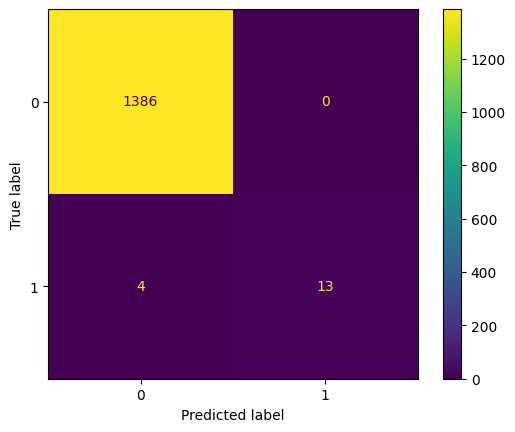

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=q_confusion)
disp.plot()
plt.show()

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_qubits, activation='relu', input_dim=data_dimension))
model.add(tf.keras.layers.Dense(data_dimension, activation='relu'))
model.add(tf.keras.layers.Dense(data_dimension, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [40]:
%%time

opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=n_epochs, batch_size=batch_size)

1310/1310 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9893 - val_loss: 0.0064 - val_accuracy: 0.9979
CPU times: user 3.89 s, sys: 117 ms, total: 4.01 s
Wall time: 5.19 s


In [41]:
# prediction:
valpredy = model.predict(valx)
valpredy_round = np.round(valpredy)

# metrics calculation:
classification = classification_report(valy[:,1], valpredy_round[:,1])
confusion = confusion_matrix(valy[:,1], valpredy_round[:,1])

accuracy = round(accuracy_score(valy[:,1], valpredy_round[:,1])*100,5)
recall = round(recall_score(valy[:,1], valpredy_round[:,1], average='macro')*100,5)
precision = round(precision_score(valy[:,1], valpredy_round[:,1], average='weighted')*100,5)
f1 = round(f1_score(valy[:,1], valpredy_round[:,1], average='weighted')*100,5)

print(f'Accuracy:\t {accuracy:.2f}%')
print(f'Recall:\t\t {recall:.2f}%')
print(f'Precision:\t {precision:.2f}%')
print(f'F1:\t\t {f1:.2f}%')

44/44 [==============================] - 0s 2ms/step
Accuracy:	 99.71%
Recall:		 88.24%
Precision:	 99.72%
F1:		 99.70%


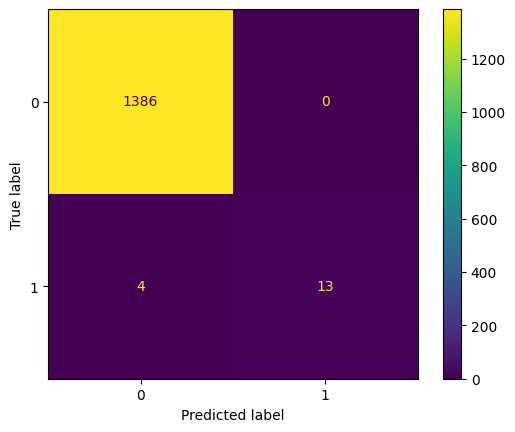

In [42]:
# plotting confusion matrix:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()

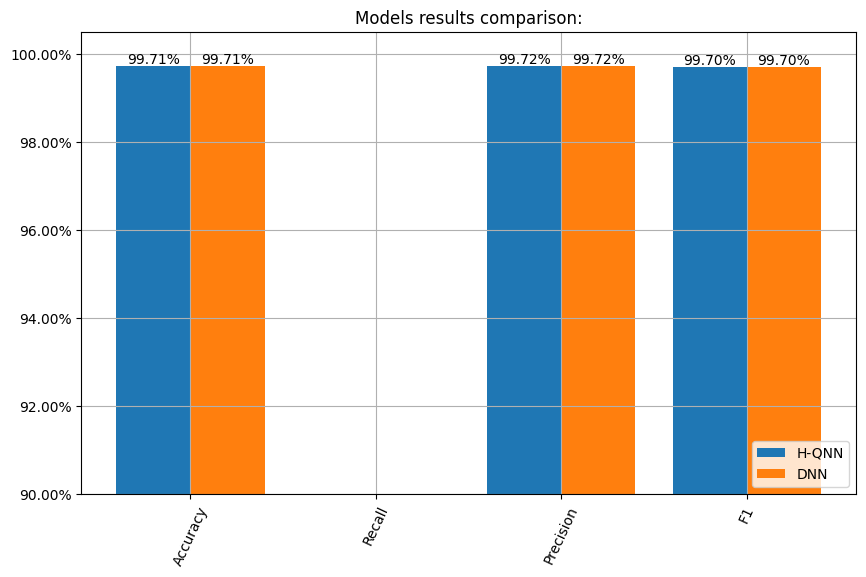

In [43]:
c_results = np.asarray([accuracy, recall, precision, f1])
q_results = np.asarray([q_accuracy, q_recall, q_precision, q_f1])
results_description = ['Accuracy', 'Recall', 'Precision', 'F1']

# plot preparation:
fig, ax = plt.subplots(figsize = (10,6))
idx = np.asarray([i for i in range(4)])
width = 0.4

# plotting:
q_bars = ax.bar(idx-width/2, q_results, width=width, label='H-QNN')
c_bars = ax.bar(idx+width/2, c_results, width=width, label='DNN')

# setting ticks:
ax.set_xticks(idx)
ax.set_title('Models results comparison:')
ax.set_xticklabels(results_description, rotation=65)
fmt = '%.2f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

# add bars labels:
ax.bar_label(c_bars, fmt=fmt)
ax.bar_label(q_bars, fmt=fmt)

# set y-axis limits
ax.set_ylim(90, 100.5)

ax.legend(loc=4)
plt.grid()

plt.show()
